# Data Exploration

***

## Load datasets

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load Excel Workbook into pandas ExcelFile object
filename = "dunnhumby - Breakfast at the Frat.xlsx"
excel = pd.ExcelFile(filename)

# View sheets in the Excel file
sheets = excel.sheet_names
print(sheets)

['Glossary', 'dh Store Lookup', 'dh Products Lookup', 'dh Transaction Data']


### Glossary: Descriptions of Field Names

In [3]:
with pd.option_context('display.max_colwidth', 200):
    display(excel.parse(sheets[0], skiprows=3, usecols=['VARIABLE NAME', 'TABLE', 'DESCRIPTION']))

VARIABLE NAME                  TABLE  \
0         ADDRESS_CITY_NAME           store lookup   
1   ADDRESS_STATE_PROV_CODE           store lookup   
2        AVG_WEEKLY_BASKETS           store lookup   
3                BASE_PRICE                   data   
4              MANUFACTURER        products lookup   
5                  CATEGORY        products lookup   
6               DESCRIPTION        products lookup   
7                   DISPLAY                   data   
8                   FEATURE                   data   
9                       HHS                   data   
10                 MSA_CODE           store lookup   
11        PARKING_SPACE_QTY           store lookup   
12                    PRICE                   data   
13            WEEK_END_DATE                   data   
14      SALES_AREA_SIZE_NUM           store lookup   
15             STORE_APPEAL           store lookup   
16                    SPEND                   data   
17                STORE_NUM     data, store lookup   
18             SUB_CATEGORY        products lookup   
19                 TPR_ONLY                   data   
20                    UNITS                   data   
21                      UPC  data, products lookup   
22                   VISITS                   data   
23             PRODUCT_SIZE        products lookup   

                                                                                                                                       DESCRIPTION  
0                                                                                                                                             city  
1                                                                                                                                            state  
2                                                                                                         average weekly baskets sold in the store  
3                                                                                                                               base price of item  
4                                                                                                                                     manufacturer  
5                                                                                                                              category of product  
6                                                                                                                              prodcut description  
7                                                                                               product was a part of in-store promotional display  
8                                                                                                                 product was in in-store circular  
9                                                                                                                       # of purchasing households  
10  (Metropolitan Statistical Area) geographic region with a high core population density and close economic ties throughout the surrounding areas  
11                                                                                               number of parking spaces in the store parking lot  
12                                                                                                  actual amount charged for the product at shelf  
13                                                                                                                                week ending date  
14                                                                                                                         square footage of store  
15                                                                                                              Retailer's designated store appeal  
16                                                                                                                     total spend

***

### Store Level Data

In [4]:
store = excel.parse(sheets[1], skiprows=1)
store.head()

STORE_ID          STORE_NAME ADDRESS_CITY_NAME ADDRESS_STATE_PROV_CODE  \
0       389          SILVERLAKE          ERLANGER                      KY   
1      2277  ANDERSON TOWNE CTR        CINCINNATI                      OH   
2      4259       WARSAW AVENUE        CINCINNATI                      OH   
3      6379            KINGWOOD          KINGWOOD                      TX   
4      6431        AT WARD ROAD           BAYTOWN                      TX   

   MSA_CODE SEG_VALUE_NAME  PARKING_SPACE_QTY  SALES_AREA_SIZE_NUM  \
0     17140     MAINSTREAM              408.0                46073   
1     17140        UPSCALE                NaN                81958   
2     17140          VALUE                NaN                48813   
3     26420     MAINSTREAM                NaN                50237   
4     26420          VALUE              350.0                43698   

   AVG_WEEKLY_BASKETS  
0        24766.807692  
1        54052.519231  
2        31177.333333  
3        20620.423077  
4        24321.942308

In [5]:
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(store.describe(percentiles=[]).T)

count      mean       std       min       50%       max
STORE_ID             79.00 14,502.47  8,868.76    367.00 15,541.00 29,159.00
MSA_CODE             79.00 21,236.20  6,138.65 13,140.00 19,100.00 47,540.00
PARKING_SPACE_QTY    27.00    480.52    403.66     17.00    351.00  1,859.00
SALES_AREA_SIZE_NUM  79.00 49,145.16 13,512.45 10,788.00 48,594.00 86,517.00
AVG_WEEKLY_BASKETS   79.00 24,146.81  8,720.40 10,434.71 24,567.75 54,052.52

<Figure size 800x400 with 0 Axes>

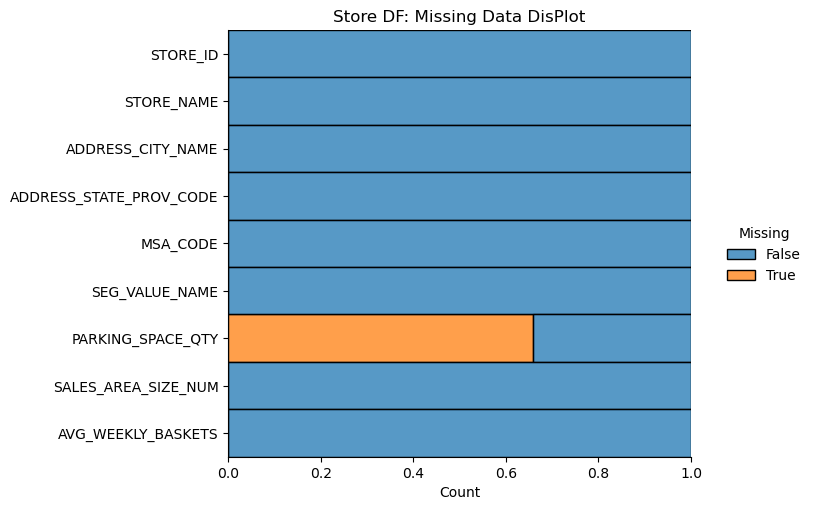

In [6]:
plt.figure(figsize=(8,4))
sns.displot(
    data=store.isna().melt(value_name="Missing", var_name="Variable"),
    y="Variable",
    hue="Missing",
    multiple="fill",
    aspect=1.5
)
plt.ylabel(None)
plt.title("Store DF: Missing Data DisPlot")
plt.show()

In [7]:
# Fill empty values for parking space with 0
store['PARKING_SPACE_QTY2'] = store['PARKING_SPACE_QTY'].fillna(0).astype(int)

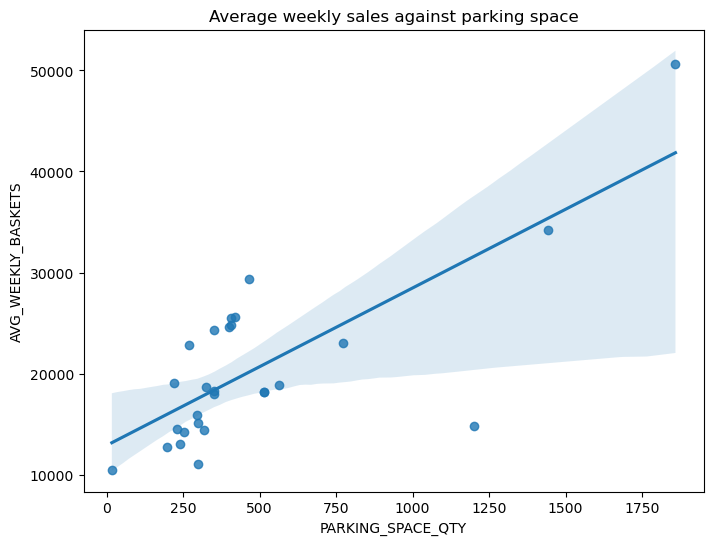

In [8]:
# Visualise the relationship between parking space (ignoring the NAs) and sales
plt.figure(figsize=(8, 6))
sns.regplot(
    data=store,
    x="PARKING_SPACE_QTY",
    y="AVG_WEEKLY_BASKETS"
)
plt.title("Average weekly sales against parking space")
plt.show()

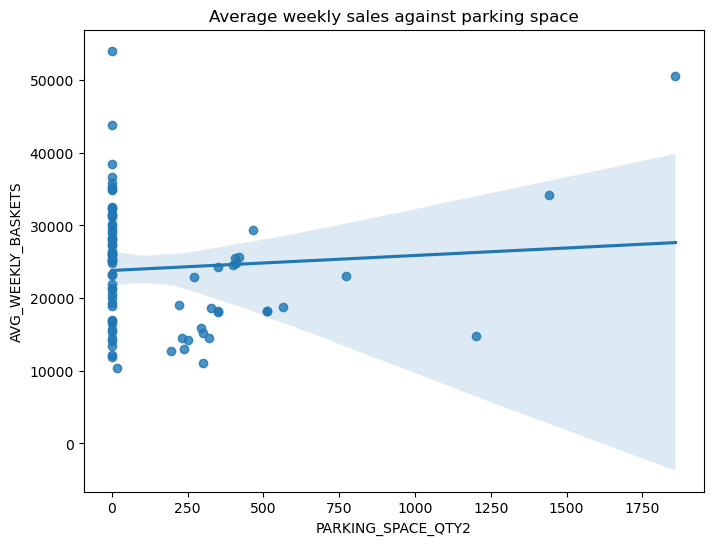

In [9]:
# Visualise the relationship between parking space and sales
plt.figure(figsize=(8, 6))
sns.regplot(
    data=store,
    x="PARKING_SPACE_QTY2",
    y="AVG_WEEKLY_BASKETS"
)
plt.title("Average weekly sales against parking space")
plt.show()

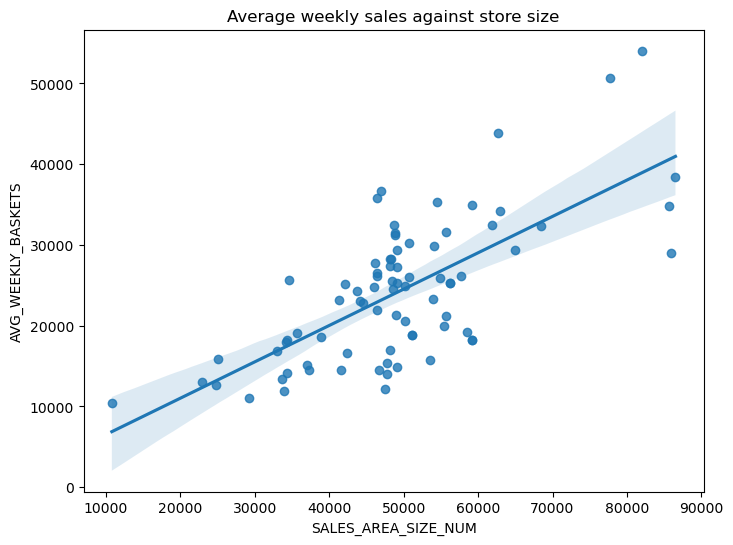

In [10]:
# Visualise the relationship between store size and sales
plt.figure(figsize=(8, 6))
sns.regplot(
    data=store,
    x="SALES_AREA_SIZE_NUM",
    y="AVG_WEEKLY_BASKETS"
)
plt.title("Average weekly sales against store size")
plt.show()

<Figure size 800x600 with 0 Axes>

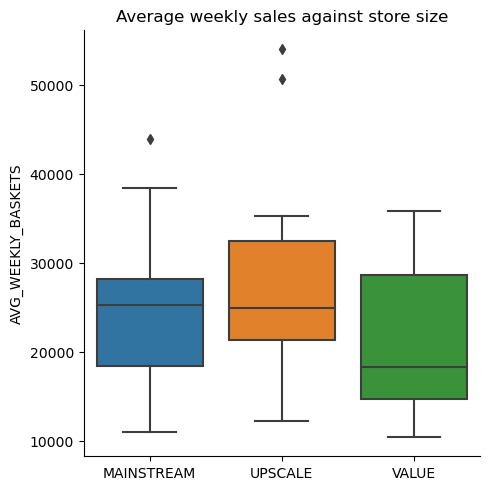

In [11]:
# Visualise the sales of different store tier
plt.figure(figsize=(8, 6))
sns.catplot(
    data=store,
    x="SEG_VALUE_NAME",
    y="AVG_WEEKLY_BASKETS",
    kind="box"
)
plt.xlabel(None)
plt.title("Average weekly sales against store size")
plt.show()

<Figure size 600x1200 with 0 Axes>

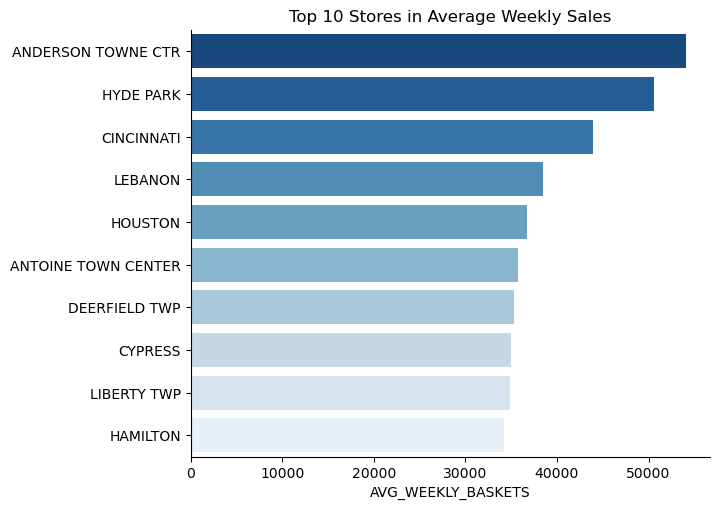

In [12]:
# Visualise the top 10 stores based on average weekly sales
plt.figure(figsize=(6, 12))
sns.catplot(
    data=store.sort_values(by="AVG_WEEKLY_BASKETS", ascending=False).head(10),
    x="AVG_WEEKLY_BASKETS",
    y="STORE_NAME",
    kind="bar",
    legend=True,
    aspect=1.5,
    palette="Blues_r"
)
plt.ylabel(None)
plt.title("Top 10 Stores in Average Weekly Sales")
plt.show()

<Figure size 600x400 with 0 Axes>

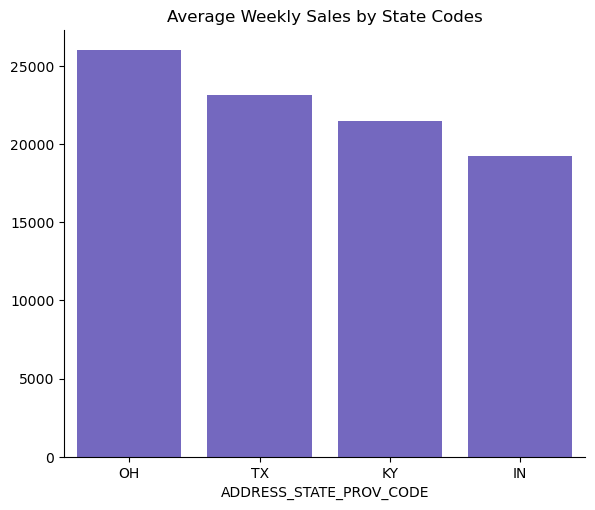

In [13]:
# Visualise the top 10 stores based on average weekly sales
plt.figure(figsize=(6, 4))
sns.catplot(
    data=(store.groupby(by=["ADDRESS_STATE_PROV_CODE"], as_index=False)
               .agg('mean')
               .sort_values(by="AVG_WEEKLY_BASKETS", ascending=False)
               .head(10)),
    x="ADDRESS_STATE_PROV_CODE",
    y="AVG_WEEKLY_BASKETS",
    kind="bar",
    legend=True,
    aspect=1.25,
    color="slateblue"
)
plt.ylabel(None)
plt.title("Average Weekly Sales by State Codes")
plt.show()

In [14]:
store.groupby(by=["ADDRESS_STATE_PROV_CODE"]).agg('mean')

STORE_ID      MSA_CODE  PARKING_SPACE_QTY  \
ADDRESS_STATE_PROV_CODE                                                  
IN                        4245.000000  17140.000000                NaN   
KY                        7944.500000  17140.000000         302.000000   
OH                       16412.290323  19355.483871         660.727273   
TX                       13974.209302  23068.372093         364.428571   

                         SALES_AREA_SIZE_NUM  AVG_WEEKLY_BASKETS  \
ADDRESS_STATE_PROV_CODE                                            
IN                              58563.000000        19274.673077   
KY                              39855.500000        21488.751602   
OH                              52428.483871        26009.040736   
TX                              47423.255814        23164.831395   

                         PARKING_SPACE_QTY2  
ADDRESS_STATE_PROV_CODE                      
IN                                 0.000000  
KY                               151.000000  
OH                               234.451613  
TX                               118.651163

***

### Product Level Data

In [15]:
product = excel.parse(sheets[2], skiprows=1)
product.head()

UPC               DESCRIPTION   MANUFACTURER               CATEGORY  \
0  1111009477    PL MINI TWIST PRETZELS  PRIVATE LABEL             BAG SNACKS   
1  1111009497         PL PRETZEL STICKS  PRIVATE LABEL             BAG SNACKS   
2  1111009507         PL TWIST PRETZELS  PRIVATE LABEL             BAG SNACKS   
3  1111035398  PL BL MINT ANTSPTC RINSE  PRIVATE LABEL  ORAL HYGIENE PRODUCTS   
4  1111038078  PL BL MINT ANTSPTC RINSE  PRIVATE LABEL  ORAL HYGIENE PRODUCTS   

               SUB_CATEGORY PRODUCT_SIZE  
0                  PRETZELS        15 OZ  
1                  PRETZELS        15 OZ  
2                  PRETZELS        15 OZ  
3  MOUTHWASHES (ANTISEPTIC)       1.5 LT  
4  MOUTHWASHES (ANTISEPTIC)       500 ML

In [16]:
display(product.describe(percentiles=[], include=["O"]).T)

count unique                       top freq
DESCRIPTION     58     55  PL BL MINT ANTSPTC RINSE    2
MANUFACTURER    58     17             PRIVATE LABEL   12
CATEGORY        58      4                BAG SNACKS   15
SUB_CATEGORY    58      7                  PRETZELS   15
PRODUCT_SIZE    58     31                     16 OZ    9

In [17]:
with pd.option_context('display.max_colwidth', 200):
    display(product.groupby(by=["CATEGORY", "MANUFACTURER"], as_index=True).agg({'UPC':'count', 'DESCRIPTION':list}))

UPC  \
CATEGORY              MANUFACTURER         
BAG SNACKS            FRITO LAY        3   
                      MKSL             3   
                      PRIVATE LABEL    3   
                      SHULTZ           3   
                      SNYDER S         3   
COLD CEREAL           GENERAL MI       3   
                      KELLOGG          3   
                      POST FOODS       3   
                      PRIVATE LABEL    3   
                      QUAKER           3   
FROZEN PIZZA          HOME RUN         3   
                      KING             3   
                      PRIVATE LABEL    3   
                      TOMBSTONE        3   
                      TONYS            3   
ORAL HYGIENE PRODUCTS CHATTEM          3   
                      COLGATE          1   
                      P & G            3   
                      PRIVATE LABEL    3   
                      WARNER           3   

                                                                                                           DESCRIPTION  
CATEGORY              MANUFACTURER                                                                                      
BAG SNACKS            FRITO LAY            [RLDGLD BRAIDED HONEY WHT, RLDGLD TINY TWISTS PRTZL, RLDGLD PRETZEL STICKS]  
                      MKSL                        [MKSL MINI TWIST PRETZELS, MKSL DUTCH PRETZELS, MKSL PRETZEL STICKS]  
                      PRIVATE LABEL                     [PL MINI TWIST PRETZELS, PL PRETZEL STICKS, PL TWIST PRETZELS]  
                      SHULTZ                        [SHURGD PRETZEL RODS, SHURGD MINI PRETZELS, SHURGD PRETZEL STICKS]  
                      SNYDER S                  [SNYDR PRETZEL RODS, SNYDR SOURDOUGH NIBBLERS, SNYDR FF MINI PRETZELS]  
COLD CEREAL           GENERAL MI                                     [GM HONEY NUT CHEERIOS, GM CHEERIOS, GM CHEERIOS]  
                      KELLOGG                       [KELL BITE SIZE MINI WHEAT, KELL FROSTED FLAKES, KELL FROOT LOOPS]  
                      POST FOODS            [POST HNY BN OTS HNY RSTD, POST FM SZ HNYBNCH OT ALM, POST FRUITY PEBBLES]  
                      PRIVATE LABEL                [PL HONEY NUT TOASTD OATS, PL RAISIN BRAN, PL BT SZ FRSTD SHRD WHT]  
                      QUAKER                        [QKER LIFE ORIGINAL, QKER CAP N CRUNCH BERRIES, QKER CAP N CRUNCH]  
FROZEN PIZZA          HOME RUN                [HMRN CLSC SAUSAGE PIZZA, HMRN CLSC SSG PEPP PIZZA, HMRN CLSC CHS PIZZA]  
                      KING                 [NWMN OWN PEPPERONI PIZZA, NWMN OWN 4 CHEESE PIZZA, NWMN OWN SUPREME PIZZA]  
                      PRIVATE LABEL      [PL SR CRUST SUPRM PIZZA, PL SR CRUST 3 MEAT PIZZA, PL SR CRUST PEPPRN PIZZA]  
                      TOMBSTONE                           [DIGIORNO THREE MEAT, DIGRN SUPREME PIZZA, DIGRN PEPP PIZZA]  
                      TONYS                      [FRSC BRCK OVN ITL PEP PZ, FRSC PEPPERONI PIZZA, FRSC 4 CHEESE PIZZA]  
ORAL HYGIENE PRODUCTS CHATTEM         [ACT MINT A/CAV FLUOR RNS, ACT KIDS BBLGUM FLUOR RNS, ACT RSTR CL SPLSH MINT MW]  
                      COLGATE                                                                    [COLG SPEARMINT WISP]  
                      P & G            [CREST PH WHTG CLN MINT TP, SCOPE ORIG MINT MOUTHWASH, CREST PH CLN MINT RINSE]  
                      PRIVATE LABEL     [PL BL MINT ANTSPTC RINSE, PL BL MINT ANTSPTC RINSE, PL ANTSPTC SPG MNT MTHWS]  
                      WARNER         [LSTRNE CL MINT ANTSPTC MW, LSTRNE CL MINT ANTSPTC MW, LSTRNE FRS BRST ANTSPC MW]

***

### Transaction Level Data

In [18]:
data = excel.parse(sheets[3], skiprows=1)
data.head()

WEEK_END_DATE  STORE_NUM         UPC  UNITS  VISITS  HHS  SPEND  PRICE  \
0    2009-01-14        367  1111009477     13      13   13  18.07   1.39   
1    2009-01-14        367  1111009497     20      18   18  27.80   1.39   
2    2009-01-14        367  1111009507     14      14   14  19.32   1.38   
3    2009-01-14        367  1111035398      4       3    3  14.00   3.50   
4    2009-01-14        367  1111038078      3       3    3   7.50   2.50   

   BASE_PRICE  FEATURE  DISPLAY  TPR_ONLY  
0        1.57        0        0         1  
1        1.39        0        0         0  
2        1.38        0        0         0  
3        4.49        0        0         1  
4        2.50        0        0         0

In [19]:
with pd.option_context('display.float_format', '{:,.2f}'.format):
    display(data.describe(percentiles=[]).T)

count              mean               std              min  \
STORE_NUM  524,950.00         14,690.11          8,891.43           367.00   
UPC        524,950.00 10,316,310,848.57 20,816,983,121.56 1,111,009,477.00   
UNITS      524,950.00             19.61             29.93             0.00   
VISITS     524,950.00             17.17             24.74             1.00   
HHS        524,950.00             16.78             24.19             1.00   
SPEND      524,950.00             53.20             68.18             0.00   
PRICE      524,927.00              3.38              1.56             0.00   
BASE_PRICE 524,765.00              3.60              1.63             0.55   
FEATURE    524,950.00              0.08              0.28             0.00   
DISPLAY    524,950.00              0.11              0.31             0.00   
TPR_ONLY   524,950.00              0.13              0.34             0.00   

                        50%               max  
STORE_NUM         15,541.00         29,159.00  
UPC        3,700,031,613.00 88,491,212,971.00  
UNITS                 10.00          1,800.00  
VISITS                 9.00          1,340.00  
HHS                    9.00          1,286.00  
SPEND                 31.92          2,952.00  
PRICE                  2.99             11.46  
BASE_PRICE             3.17             11.46  
FEATURE                0.00              1.00  
DISPLAY                0.00              1.00  
TPR_ONLY               0.00              1.00

### Check for outliers in transaction level data

In [20]:
data["UPV"] = data["UNITS"] / data["VISITS"]
data["VPH"] = data["VISITS"] / data["HHS"]
data["UPH"] = data["UNITS"] / data["HHS"]

In [21]:
upv_outliers = data[data['UPV'] >= data['UPV'].quantile(0.9999)]
print(upv_outliers.shape)
print("Outliers: ", upv_outliers['UPC'].unique().tolist())
print("Stores: ", upv_outliers['STORE_NUM'].unique().tolist())
display(upv_outliers.sort_values(by="UPV", ascending=False).iloc[:5,[0,1,2,3,12,13,14]])

(57, 15)
Outliers:  [2840002333, 1111038078, 1111035398, 2840004770, 2840004768, 7797502248, 1111009477, 7027312504, 31254742725, 1111038080, 3700031613, 1111085319, 2066200531, 3700019521, 7110410471, 7797508004]
Stores:  [17599, 10019, 15755, 13837, 11967, 13827, 2505, 21237, 23327, 4259, 8263, 2523, 6179, 8041, 2495, 19521, 6379, 15541, 4489, 13859, 2279, 21485]


WEEK_END_DATE  STORE_NUM         UPC  UNITS        UPV       VPH  \
323827    2010-11-24       6179  3700031613     51  25.500000  1.000000   
327963    2010-12-01      13827  1111009477    480  19.200000  1.190476   
324470    2010-11-24      13827  1111009477    670  17.179487  1.258065   
292912    2010-09-22      13827  1111009477    422  11.722222  1.125000   
331454    2010-12-08      13827  1111009477    519  11.533333  1.125000   

              UPH  
323827  25.500000  
327963  22.857143  
324470  21.612903  
292912  13.187500  
331454  12.975000

In [22]:
product[product['UPC'].isin(upv_outliers['UPC'].unique().tolist())]

UPC                DESCRIPTION   MANUFACTURER  \
0    1111009477     PL MINI TWIST PRETZELS  PRIVATE LABEL   
3    1111035398   PL BL MINT ANTSPTC RINSE  PRIVATE LABEL   
4    1111038078   PL BL MINT ANTSPTC RINSE  PRIVATE LABEL   
5    1111038080   PL ANTSPTC SPG MNT MTHWS  PRIVATE LABEL   
6    1111085319   PL HONEY NUT TOASTD OATS  PRIVATE LABEL   
16   2066200531    NWMN OWN 4 CHEESE PIZZA           KING   
18   2840002333   RLDGLD BRAIDED HONEY WHT      FRITO LAY   
19   2840004768   RLDGLD TINY TWISTS PRTZL      FRITO LAY   
20   2840004770      RLDGLD PRETZEL STICKS      FRITO LAY   
28   3700019521  CREST PH WHTG CLN MINT TP          P & G   
29   3700031613  SCOPE ORIG MINT MOUTHWASH          P & G   
37   7027312504        SHURGD PRETZEL RODS         SHULTZ   
42   7110410471        MKSL PRETZEL STICKS           MKSL   
49   7797502248         SNYDR PRETZEL RODS       SNYDER S   
50   7797508004   SNYDR SOURDOUGH NIBBLERS       SNYDER S   
52  31254742725  LSTRNE CL MINT ANTSPTC MW         WARNER   

                 CATEGORY                 SUB_CATEGORY PRODUCT_SIZE  
0              BAG SNACKS                     PRETZELS        15 OZ  
3   ORAL HYGIENE PRODUCTS     MOUTHWASHES (ANTISEPTIC)       1.5 LT  
4   ORAL HYGIENE PRODUCTS     MOUTHWASHES (ANTISEPTIC)       500 ML  
5   ORAL HYGIENE PRODUCTS     MOUTHWASHES (ANTISEPTIC)       500 ML  
6             COLD CEREAL            ALL FAMILY CEREAL     12.25 OZ  
16           FROZEN PIZZA                PIZZA/PREMIUM      13.3 OZ  
18             BAG SNACKS                     PRETZELS        10 OZ  
19             BAG SNACKS                     PRETZELS        16 OZ  
20             BAG SNACKS                     PRETZELS        16 OZ  
28  ORAL HYGIENE PRODUCTS  MOUTHWASH/RINSES AND SPRAYS       4.2 OZ  
29  ORAL HYGIENE PRODUCTS  MOUTHWASH/RINSES AND SPRAYS         1 LT  
37             BAG SNACKS                     PRETZELS        12 OZ  
42             BAG SNACKS                     PRETZELS        16 OZ  
49             BAG SNACKS                     PRETZELS        10 OZ  
50             BAG SNACKS                     PRETZELS        16 OZ  
52  ORAL HYGIENE PRODUCTS     MOUTHWASHES (ANTISEPTIC)       500 ML

In [23]:
vph_outliers = data[data['VPH'] >= data['VPH'].quantile(0.9999)]
print(vph_outliers.shape)
print("Outliers: ", vph_outliers['UPC'].unique().tolist())
print("Stores: ", vph_outliers['STORE_NUM'].unique().tolist())
display(vph_outliers.sort_values(by="VPH", ascending=False).iloc[:5,[0,1,2,3,12,13,14]])

(54, 15)
Outliers:  [3800031829, 1600027564, 88491201426, 3000006340, 88491201427, 1600027528]
Stores:  [23055, 8035, 4259, 367, 25021, 25001]


WEEK_END_DATE  STORE_NUM          UPC  UNITS       UPV   VPH   UPH
479987    2011-10-05       8035  88491201426     24  1.200000  20.0  24.0
496432    2011-11-09       8035  88491201426     18  1.500000  12.0  18.0
390404    2011-04-06       8035  88491201426     26  1.238095  10.5  13.0
50053     2009-05-06       4259  88491201426     23  1.210526   9.5  11.5
79108     2009-07-08       8035   1600027564     13  1.444444   9.0  13.0

In [24]:
product[product['UPC'].isin(vph_outliers['UPC'].unique().tolist())]

UPC                DESCRIPTION MANUFACTURER     CATEGORY  \
13   1600027528                GM CHEERIOS   GENERAL MI  COLD CEREAL   
14   1600027564                GM CHEERIOS   GENERAL MI  COLD CEREAL   
21   3000006340         QKER LIFE ORIGINAL       QUAKER  COLD CEREAL   
31   3800031829  KELL BITE SIZE MINI WHEAT      KELLOGG  COLD CEREAL   
55  88491201426   POST HNY BN OTS HNY RSTD   POST FOODS  COLD CEREAL   
56  88491201427  POST FM SZ HNYBNCH OT ALM   POST FOODS  COLD CEREAL   

         SUB_CATEGORY PRODUCT_SIZE  
13  ALL FAMILY CEREAL        18 OZ  
14  ALL FAMILY CEREAL        12 OZ  
21  ALL FAMILY CEREAL        13 OZ  
31  ALL FAMILY CEREAL        18 OZ  
55       ADULT CEREAL        18 OZ  
56       ADULT CEREAL        18 OZ

In [25]:
uph_outliers = data[data['UPH'] >= data['UPH'].quantile(0.9999)]
print("Outliers: ", uph_outliers['UPC'].unique().tolist())
print("Stores: ", uph_outliers['STORE_NUM'].unique().tolist())
print(uph_outliers.shape)
display(uph_outliers.sort_values(by="UPH", ascending=False).iloc[:5,[0,1,2,3,12,13,14]])

Outliers:  [2840002333, 2840004770, 88491201426, 1600027564, 1111009477, 1600027528, 31254742725, 1111038080, 3700031613, 1111085319, 88491201427, 3700019521, 3800031829]
Stores:  [17599, 11967, 4259, 8035, 13827, 23055, 367, 8263, 6179, 23327, 19521, 13859, 25027]
(53, 15)


WEEK_END_DATE  STORE_NUM          UPC  UNITS        UPV        VPH  \
323827    2010-11-24       6179   3700031613     51  25.500000   1.000000   
479987    2011-10-05       8035  88491201426     24   1.200000  20.000000   
327963    2010-12-01      13827   1111009477    480  19.200000   1.190476   
324470    2010-11-24      13827   1111009477    670  17.179487   1.258065   
496432    2011-11-09       8035  88491201426     18   1.500000  12.000000   

              UPH  
323827  25.500000  
479987  24.000000  
327963  22.857143  
324470  21.612903  
496432  18.000000

In [26]:
product[product['UPC'].isin(uph_outliers['UPC'].unique().tolist())]

UPC                DESCRIPTION   MANUFACTURER  \
0    1111009477     PL MINI TWIST PRETZELS  PRIVATE LABEL   
5    1111038080   PL ANTSPTC SPG MNT MTHWS  PRIVATE LABEL   
6    1111085319   PL HONEY NUT TOASTD OATS  PRIVATE LABEL   
13   1600027528                GM CHEERIOS     GENERAL MI   
14   1600027564                GM CHEERIOS     GENERAL MI   
18   2840002333   RLDGLD BRAIDED HONEY WHT      FRITO LAY   
20   2840004770      RLDGLD PRETZEL STICKS      FRITO LAY   
28   3700019521  CREST PH WHTG CLN MINT TP          P & G   
29   3700031613  SCOPE ORIG MINT MOUTHWASH          P & G   
31   3800031829  KELL BITE SIZE MINI WHEAT        KELLOGG   
52  31254742725  LSTRNE CL MINT ANTSPTC MW         WARNER   
55  88491201426   POST HNY BN OTS HNY RSTD     POST FOODS   
56  88491201427  POST FM SZ HNYBNCH OT ALM     POST FOODS   

                 CATEGORY                 SUB_CATEGORY PRODUCT_SIZE  
0              BAG SNACKS                     PRETZELS        15 OZ  
5   ORAL HYGIENE PRODUCTS     MOUTHWASHES (ANTISEPTIC)       500 ML  
6             COLD CEREAL            ALL FAMILY CEREAL     12.25 OZ  
13            COLD CEREAL            ALL FAMILY CEREAL        18 OZ  
14            COLD CEREAL            ALL FAMILY CEREAL        12 OZ  
18             BAG SNACKS                     PRETZELS        10 OZ  
20             BAG SNACKS                     PRETZELS        16 OZ  
28  ORAL HYGIENE PRODUCTS  MOUTHWASH/RINSES AND SPRAYS       4.2 OZ  
29  ORAL HYGIENE PRODUCTS  MOUTHWASH/RINSES AND SPRAYS         1 LT  
31            COLD CEREAL            ALL FAMILY CEREAL        18 OZ  
52  ORAL HYGIENE PRODUCTS     MOUTHWASHES (ANTISEPTIC)       500 ML  
55            COLD CEREAL                 ADULT CEREAL        18 OZ  
56            COLD CEREAL                 ADULT CEREAL        18 OZ

<AxesSubplot:>

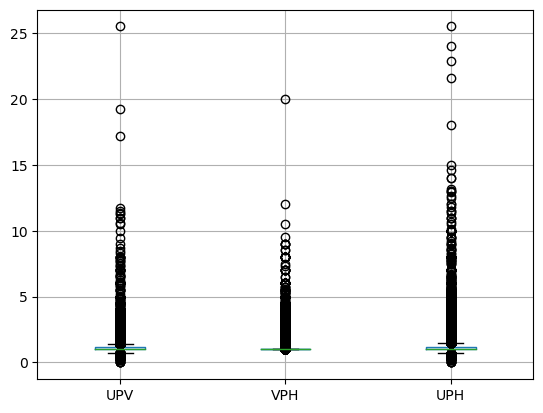

In [27]:
data.boxplot(["UPV", "VPH", "UPH"])

### 1) What are the product price ranges?

In [28]:
data_upc = data.merge(product, how="inner", on="UPC")
print(data.shape, data_upc.shape)

(524950, 15) (524950, 20)


In [30]:
categories = data_upc['CATEGORY'].unique().tolist()

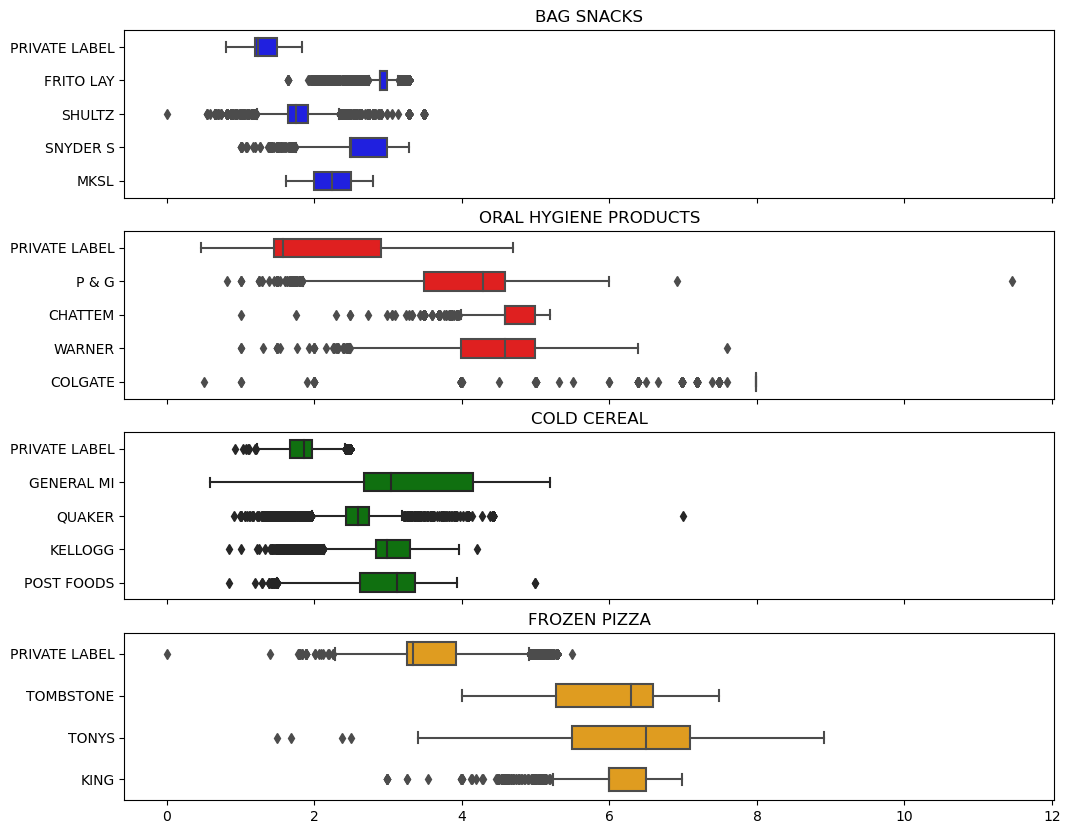

In [31]:
fig, axes = plt.subplots(4, 1, figsize=(12, 10), sharex=True)
colors = ['blue', 'red', 'green','orange']
for i in range(4):
    sns.boxplot(data = data_upc[data_upc["CATEGORY"] == categories[i]],
                y = "MANUFACTURER",
                x = "PRICE",
                width=0.55,
                color=colors[i],
                ax = axes[i]
                )
    axes[i].set_title(categories[i])
    axes[i].set_ylabel(None)
    axes[i].set_xlabel(None)
plt.show()

**By Category**

* Bag snacks £1 to £4
* Oral hygiene product £0.5 to £8 
* Cold cereal £0.5 to £5
* Frozen pizza £2 to £9

**By Brand**

* Products with brands are generally priced higher by 1.5x up to 4x higher than private labels
* Private labels are tend to also have very low price ranges, likely due to its lower profit margin
* Colgate, a brand under oral hygiene product, shows the largest range of prices for its products between £1 to £8, but shows infrequent discounts based on its single line boxplot
* On the other hand, other oral hygiene products shows relatively long whiskers potentially indicating frequent discounting

In [32]:
data_upc[data_upc['CATEGORY'] == "ORAL HYGIENE PRODUCTS"].groupby(by=["MANUFACTURER"]).agg(sum)['UNITS'] / data_upc[data_upc['CATEGORY'] == "ORAL HYGIENE PRODUCTS"]["UNITS"].sum()

MANUFACTURER
CHATTEM          0.095280
COLGATE          0.003517
P & G            0.246495
PRIVATE LABEL    0.354337
WARNER           0.300371
Name: UNITS, dtype: float64

In [33]:
product[product['MANUFACTURER'] == "COLGATE"]

UPC          DESCRIPTION MANUFACTURER               CATEGORY  \
27  3500068914  COLG SPEARMINT WISP      COLGATE  ORAL HYGIENE PRODUCTS   

                   SUB_CATEGORY PRODUCT_SIZE  
27  MOUTHWASH/RINSES AND SPRAYS        16 CT

### 2) Specific price threshold that drive significant differences in sales?

In [34]:
def promo_type(row):
    if row["FEATURE"] == 1 and row["DISPLAY"] == 0:
        return "FEATURE"
    elif row["FEATURE"] == 0 and row["DISPLAY"] == 1:
        return "DISPLAY"
    elif row["FEATURE"] == 1 and row["DISPLAY"] == 1:
        return "BOTH"
    elif row["TPR_ONLY"] == 1:
        return "TPR"
    else:
        return "NORMAL"    

In [35]:
data_upc["TYPE"] = data_upc[["FEATURE", "DISPLAY", "TPR_ONLY"]].apply(promo_type, axis=1)
data_upc["DISCOUNT"] = data_upc["BASE_PRICE"] - data_upc["PRICE"]
data_upc["DISC_RATE"] = data_upc["DISCOUNT"] / data_upc["BASE_PRICE"]
data_upc.head()

WEEK_END_DATE  STORE_NUM         UPC  UNITS  VISITS  HHS   SPEND  PRICE  \
0    2009-01-14        367  1111009477     13      13   13   18.07   1.39   
1    2009-01-14        387  1111009477    111      98   94  154.29   1.39   
2    2009-01-14        389  1111009477     71      68   68   98.69   1.39   
3    2009-01-14        613  1111009477     76      66   66   93.48   1.23   
4    2009-01-14        623  1111009477     33      28   28   38.28   1.16   

   BASE_PRICE  FEATURE  ...       VPH       UPH             DESCRIPTION  \
0        1.57        0  ...  1.000000  1.000000  PL MINI TWIST PRETZELS   
1        1.39        0  ...  1.042553  1.180851  PL MINI TWIST PRETZELS   
2        1.39        0  ...  1.000000  1.044118  PL MINI TWIST PRETZELS   
3        1.23        0  ...  1.000000  1.151515  PL MINI TWIST PRETZELS   
4        1.16        0  ...  1.000000  1.178571  PL MINI TWIST PRETZELS   

    MANUFACTURER    CATEGORY SUB_CATEGORY PRODUCT_SIZE     TYPE DISCOUNT  \
0  PRIVATE LABEL  BAG SNACKS     PRETZELS        15 OZ      TPR     0.18   
1  PRIVATE LABEL  BAG SNACKS     PRETZELS        15 OZ   NORMAL     0.00   
2  PRIVATE LABEL  BAG SNACKS     PRETZELS        15 OZ   NORMAL     0.00   
3  PRIVATE LABEL  BAG SNACKS     PRETZELS        15 OZ  DISPLAY     0.00   
4  PRIVATE LABEL  BAG SNACKS     PRETZELS        15 OZ  DISPLAY     0.00   

  DISC_RATE  
0   0.11465  
1   0.00000  
2   0.00000  
3   0.00000  
4   0.00000  

[5 rows x 23 columns]

In [36]:
data_upc['PREV_PROMO'] = data_upc.groupby(by=['STORE_NUM', 'UPC'])['TYPE'].shift(1)
data_upc['PREV_SALES'] = data_upc.groupby(by=['STORE_NUM', 'UPC'])['UNITS'].shift(1)
data_upc['PREV_PRICE'] = data_upc.groupby(by=['STORE_NUM', 'UPC'])['PRICE'].shift(1)
data_upc['PREV_UPV'] = data_upc.groupby(by=['STORE_NUM', 'UPC'])['UPV'].shift(1)
data_upc.tail()

WEEK_END_DATE  STORE_NUM         UPC  UNITS  VISITS  HHS  SPEND  PRICE  \
524945    2012-01-04      25233  2066200532      1       1    1   6.99   6.99   
524946    2012-01-04      25261  2066200532      1       1    1   6.99   6.99   
524947    2012-01-04      27175  2066200532      1       1    1   6.99   6.99   
524948    2012-01-04      28909  2066200532      2       2    2  13.98   6.99   
524949    2012-01-04      29159  2066200532      1       1    1   6.99   6.99   

        BASE_PRICE  FEATURE  ...      CATEGORY   SUB_CATEGORY  PRODUCT_SIZE  \
524945        6.99        0  ...  FROZEN PIZZA  PIZZA/PREMIUM       14.7 OZ   
524946        6.99        0  ...  FROZEN PIZZA  PIZZA/PREMIUM       14.7 OZ   
524947        6.99        0  ...  FROZEN PIZZA  PIZZA/PREMIUM       14.7 OZ   
524948        6.99        0  ...  FROZEN PIZZA  PIZZA/PREMIUM       14.7 OZ   
524949        6.99        0  ...  FROZEN PIZZA  PIZZA/PREMIUM       14.7 OZ   

          TYPE  DISCOUNT DISC_RATE PREV_PROMO PREV_SALES PREV_PRICE PREV_UPV  
524945  NORMAL       0.0       0.0     NORMAL        1.0       6.49      1.0  
524946  NORMAL       0.0       0.0     NORMAL        5.0       6.99      1.0  
524947  NORMAL       0.0       0.0     NORMAL        2.0       6.99      2.0  
524948  NORMAL       0.0       0.0     NORMAL        2.0       6.99      1.0  
524949  NORMAL       0.0       0.0     NORMAL        2.0       6.49      1.0  

[5 rows x 27 columns]

In [37]:
base_price_data = (
    data_upc.groupby(by=["UPC", "STORE_NUM", "TYPE", "BASE_PRICE"], as_index=False)
           .agg(AVG_SALES = ('UNITS','mean'))
           .query("TYPE == 'NORMAL'")
           .drop(columns=["TYPE"])
)

base_price_data.head()

UPC  STORE_NUM  BASE_PRICE  AVG_SALES
2  1111009477        367        1.19       13.0
3  1111009477        367        1.22       15.5
4  1111009477        367        1.23       17.0
5  1111009477        367        1.25       16.0
6  1111009477        367        1.34       13.0

In [38]:
data_upc2 = data_upc.merge(base_price_data, how="inner", on=["UPC", "STORE_NUM", "BASE_PRICE"])

In [39]:
data_upc2['SALES_INC'] = data_upc2['UNITS'] - data_upc2['AVG_SALES']
data_upc2['SALES_INC_RATE'] = data_upc2['SALES_INC'] / data_upc2['AVG_SALES']
data_upc2.head()

WEEK_END_DATE  STORE_NUM         UPC  UNITS  VISITS  HHS   SPEND  PRICE  \
0    2009-01-14        367  1111009477     13      13   13   18.07   1.39   
1    2009-01-21        367  1111009477     24      23   23   33.36   1.39   
2    2011-08-24        367  1111009477      7       6    6   10.99   1.57   
3    2009-01-14        387  1111009477    111      98   94  154.29   1.39   
4    2009-01-28        387  1111009477    107      93   93  148.73   1.39   

   BASE_PRICE  FEATURE  ...    TYPE  DISCOUNT  DISC_RATE  PREV_PROMO  \
0        1.57        0  ...     TPR      0.18    0.11465         NaN   
1        1.57        0  ...     TPR      0.18    0.11465         TPR   
2        1.57        0  ...  NORMAL      0.00    0.00000      NORMAL   
3        1.39        0  ...  NORMAL      0.00    0.00000         NaN   
4        1.39        0  ...  NORMAL      0.00    0.00000      NORMAL   

   PREV_SALES PREV_PRICE  PREV_UPV   AVG_SALES  SALES_INC SALES_INC_RATE  
0         NaN        NaN       NaN    7.000000   6.000000       0.857143  
1        13.0       1.39  1.000000    7.000000  17.000000       2.428571  
2        10.0       1.52  1.111111    7.000000   0.000000       0.000000  
3         NaN        NaN       NaN  104.666667   6.333333       0.060510  
4        87.0       1.38  1.144737  104.666667   2.333333       0.022293  

[5 rows x 30 columns]

In [40]:
data_upc2['PRICE_BIN'] = pd.cut(data_upc2['BASE_PRICE']
                                , bins = [0, 1, 2, 3, 4, 5, 6, 7, 8, 12]
                                , labels = ['0_1', '1_2', '2_3', '3_4', '4_5', '5_6', '6_7', '7_8', '>8'])

data_upc2['DISC_BIN'] = pd.cut(data_upc2['DISC_RATE']
                                , bins = np.arange(0, 1.1, 0.1)
                                , labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60'
                                            , '60-70', '70-80', '80-90', '90-100'])

data_upc2['SALES_INC_BIN'] = pd.cut(data_upc2['SALES_INC_RATE']
                                , bins = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 10]
                                , labels = ['0_0.5', '0.5_1.0', '1.0_1.5', '1.5_2.0', '2.0_2.5', '2.5_3.0'
                                            , '3.0_3.5', '3.5_4.0', '4.0_4.5', '4.5_5.0', '>5.0'])

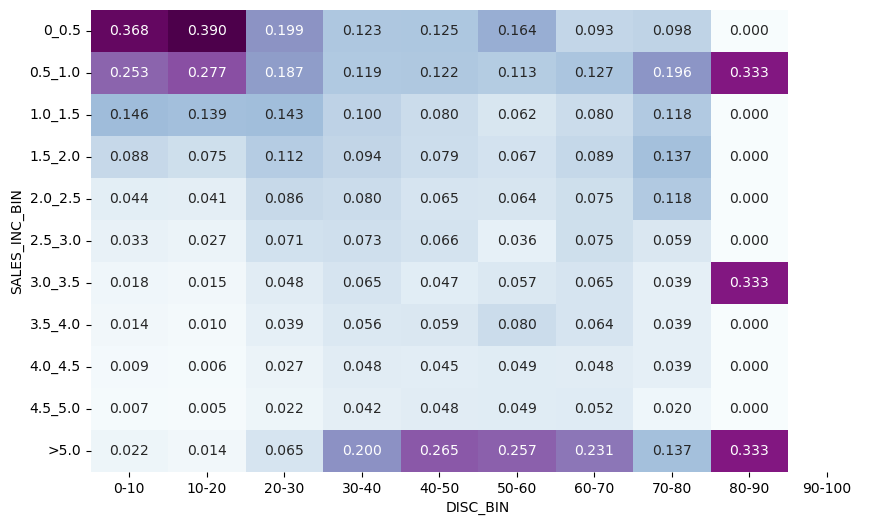

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(data = data_upc2.pivot_table(values="SALES_INC_RATE"
                                         , index="SALES_INC_BIN"
                                         , columns="DISC_BIN"
                                         , aggfunc='count')\
                            .apply(lambda x: x/sum(x), axis=0)
            , cmap = 'BuPu'
            , annot = True
            , fmt = '.3f'
            , cbar = False)
plt.yticks(rotation=0)
plt.show()

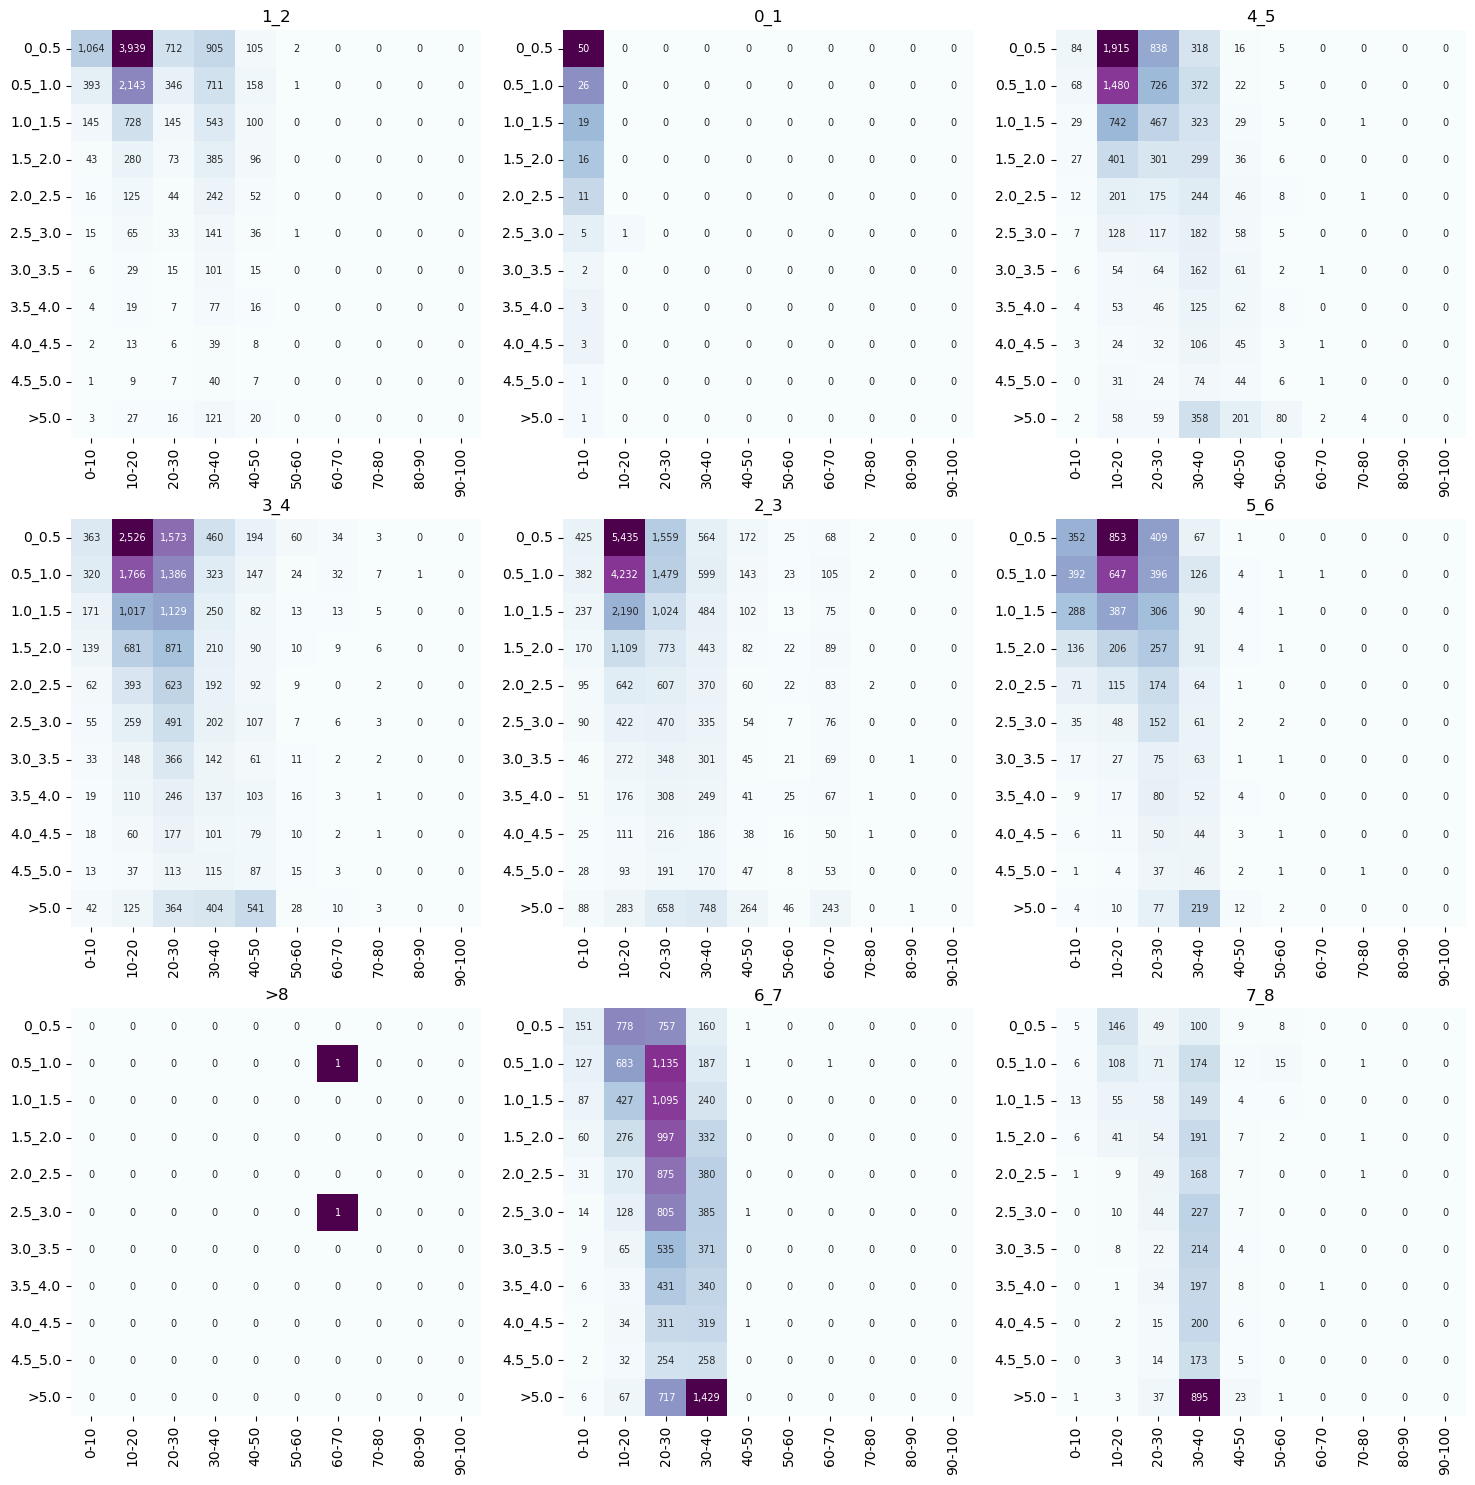

In [42]:
price_bins = data_upc2['PRICE_BIN'].unique().tolist()
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
idx = 0
for i in range(3):
    for j in range(3):
        hmdata = (data_upc2[data_upc2['PRICE_BIN'] == price_bins[idx]]
                      .pivot_table(values="SALES_INC_RATE"
                                   , index="SALES_INC_BIN"
                                   , columns="DISC_BIN"
                                   , aggfunc='count')
                 )
        sns.heatmap(data = hmdata
                    , cmap = 'BuPu'
                    , annot = True
                    , annot_kws = {'size':7}
                    , fmt = '#,'
                    , cbar = False
                    , ax = axes[i, j])
        axes[i,j].set_title(price_bins[idx])
        axes[i,j].set_ylabel(None)
        axes[i,j].set_xlabel(None)
        idx += 1
plt.show()

**Price threshold**

It appears that at discount rate up to 20%, around 50% of the time the sales went up by up to 100%. It seems unlikely that the increase in sales is significant. However, once the price drop goes to 30% and above, the increase in sales is significantly higher at 20% of the time having more than 5x increase in sales.

No specific price threshold for these 500% increase in sales to occur, but most frequenly seen in approximately £2 and £5 discounted price range.

Peaks observed at base price of £2.5 to £3.5 discounted to around £2 and base price of £5, £6.5 to £7.5 discounted to £4 to £5.

array([[<AxesSubplot:title={'center':'PRICE'}>,
        <AxesSubplot:title={'center':'BASE_PRICE'}>]], dtype=object)

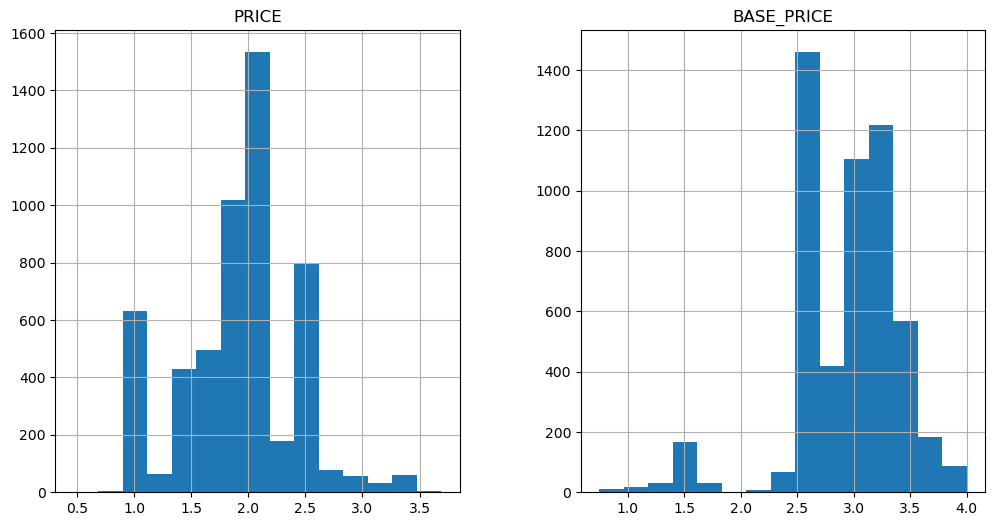

In [43]:
data_upc2[(data_upc2["SALES_INC_RATE"] >= 5) & (data_upc2["BASE_PRICE"] <= 4)][["PRICE", "BASE_PRICE"]].hist(bins=15, figsize=(12,6))

### 3) Effects on sales of promotions, display and feature

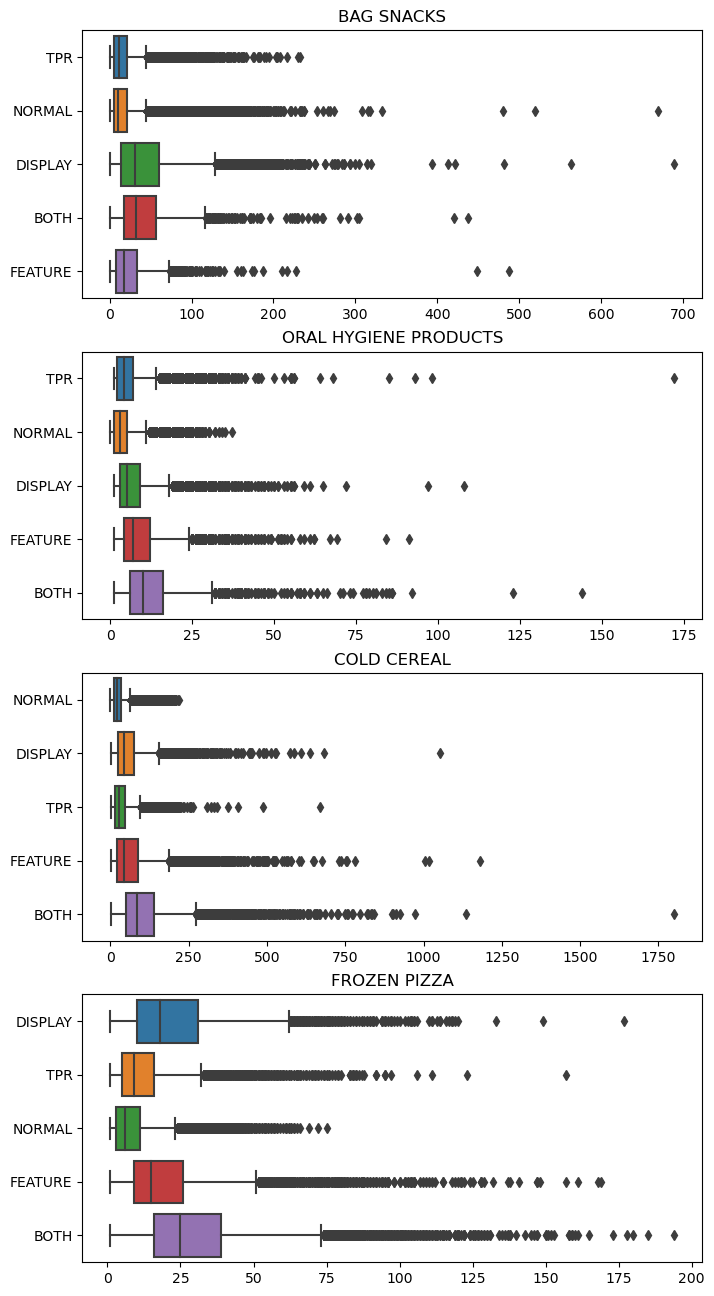

In [44]:
fig, axes = plt.subplots(4, 1, figsize=(8, 16))
for i in range(4):
    sns.boxplot(data = data_upc[data_upc["CATEGORY"] == categories[i]],
                y = "TYPE",
                x = "UNITS",
                ax = axes[i]
                )
    axes[i].set_title(categories[i])
    axes[i].set_ylabel(None)
    axes[i].set_xlabel(None)
plt.show()

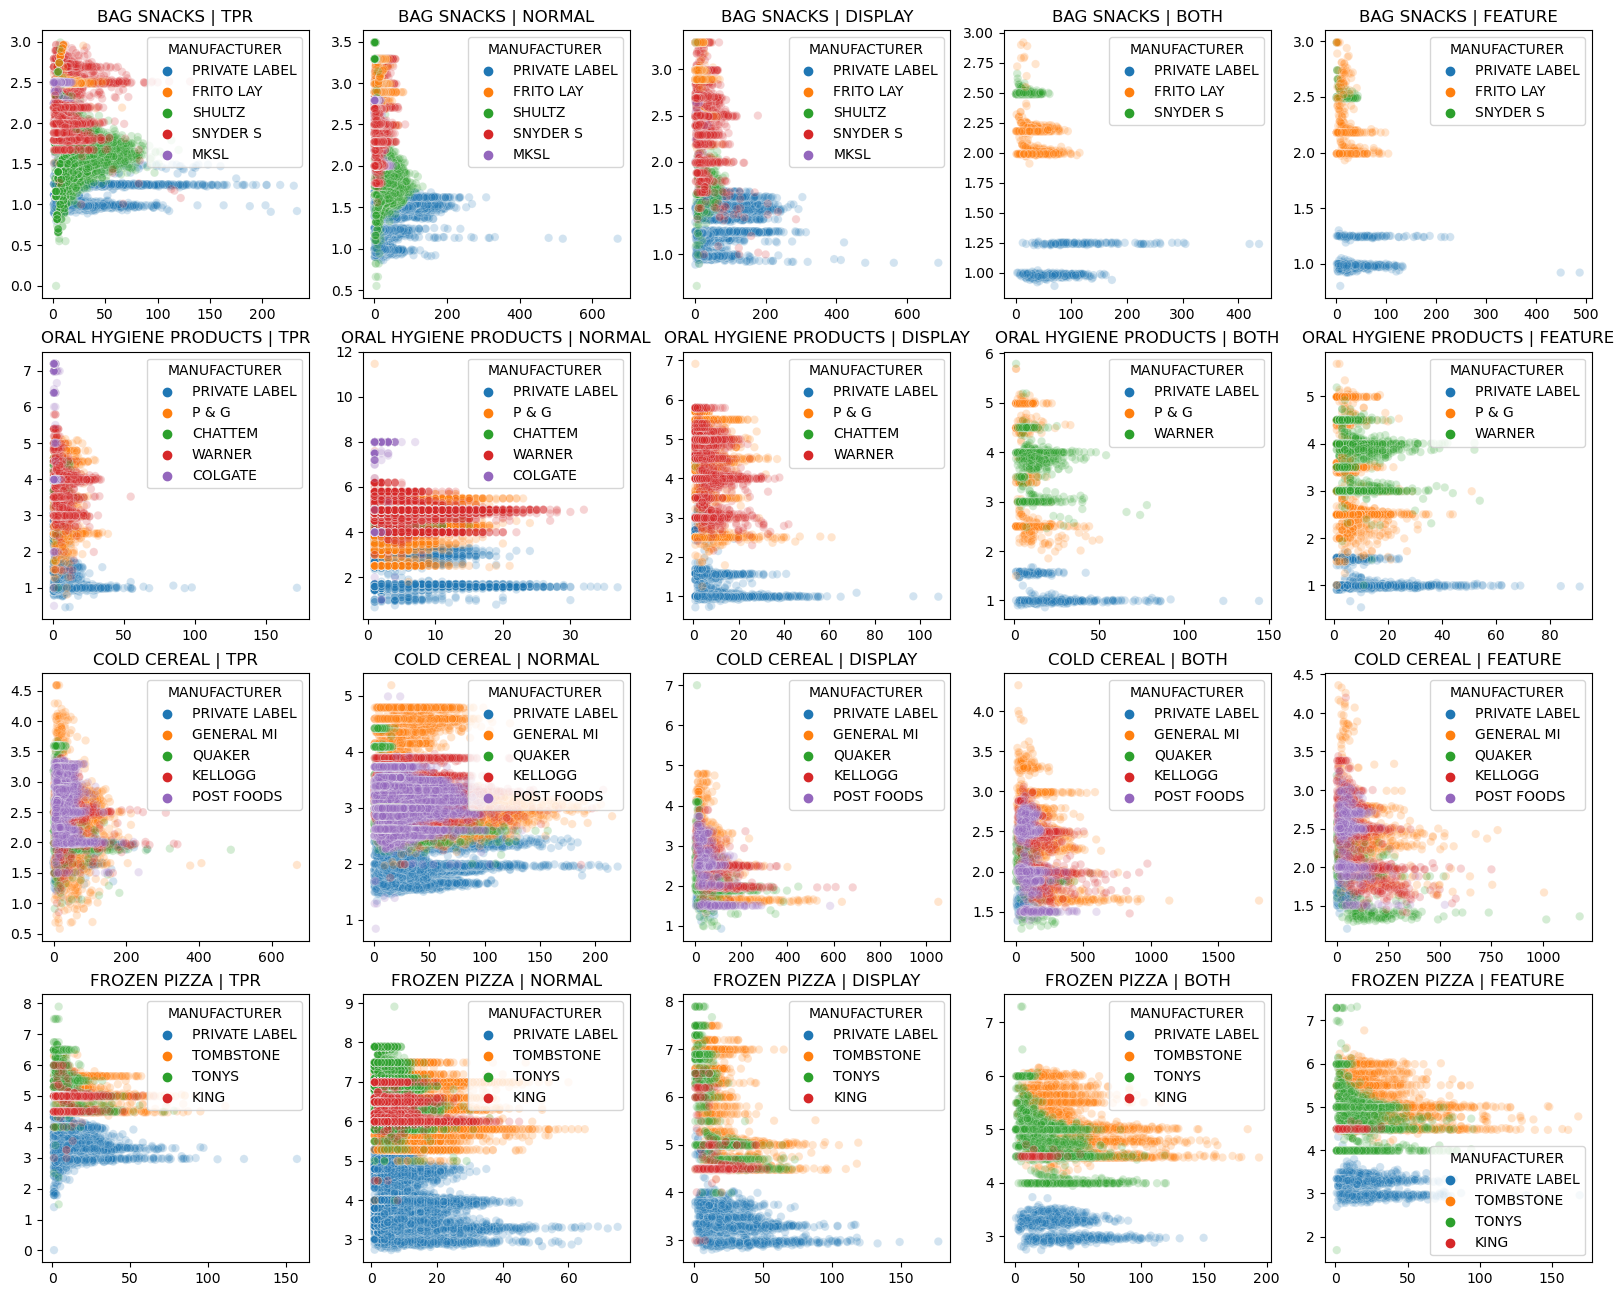

In [45]:
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
promo_types = data_upc['TYPE'].unique().tolist()
for i in range(4):
    for j in range(5):
        condition = (data_upc["TYPE"] == promo_types[j]) & (data_upc["CATEGORY"] == categories[i])
        sns.scatterplot(data = data_upc[condition],
                        y = "PRICE",
                        x = "UNITS",
                        hue = "MANUFACTURER",
                        alpha = 0.2,
                        ax = axes[i, j]
                        )
        axes[i,j].set_title(categories[i] + " | " + promo_types[j])
        axes[i,j].set_ylabel(None)
        axes[i,j].set_xlabel(None)
plt.show()

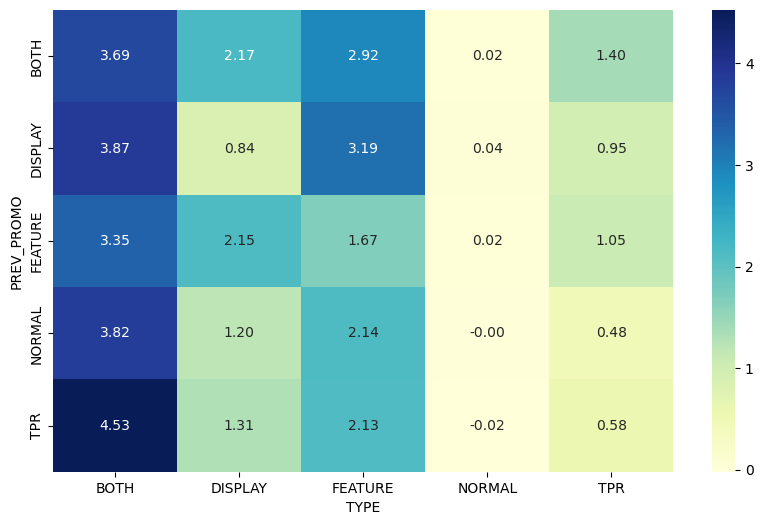

In [46]:
plt.figure(figsize=(10,6))
sns.heatmap(data = (
                data_upc2.pivot_table(
                    values="SALES_INC_RATE"
                    , index="PREV_PROMO"
                    , columns="TYPE")
            )
            , annot = True
            , cmap = 'YlGnBu'
            , fmt='.2f')
plt.show()

When a promotion is applied without previous effect of promotion, it appears that putting on display and feature promotion at the same time brings about the largest increase in sales around 3.8x increase. Featuring products in circular is also more impactful (2.1x increase) than putting them on display promotion (1.2x increase). Temporary promotional price do not bring a significant increase in sales (0.5x increase).

However, as we plot the effects on sales factoring in previous week's promotion, we can observe that there is a carry-over effect to the current week's sales.

When the current week has no promotion in effect, it would be best to end off the previous week with a display promotion, which boosts the sales by slight amount of 0.04x.

Having the product on temporary promotion the week before, before putting them on both display and feature promotion seems to bring about the highest increase in sales by 4.5x on average.

Temporary promotion in current week has higher effect on sales when the previous week has promotional exposure, as we observe higher increase in sales in current week's TPR when compared with sales increase with no promotion in the previous week.

Putting the products on consecutive promotion of the same type is not a great move as the increase in sales dies down. Featuring the products, on the other hand, after a display boosts the sales to 2.2x. Similarly, putting products on display after a feature promotion brings up the sales to 3.2x.

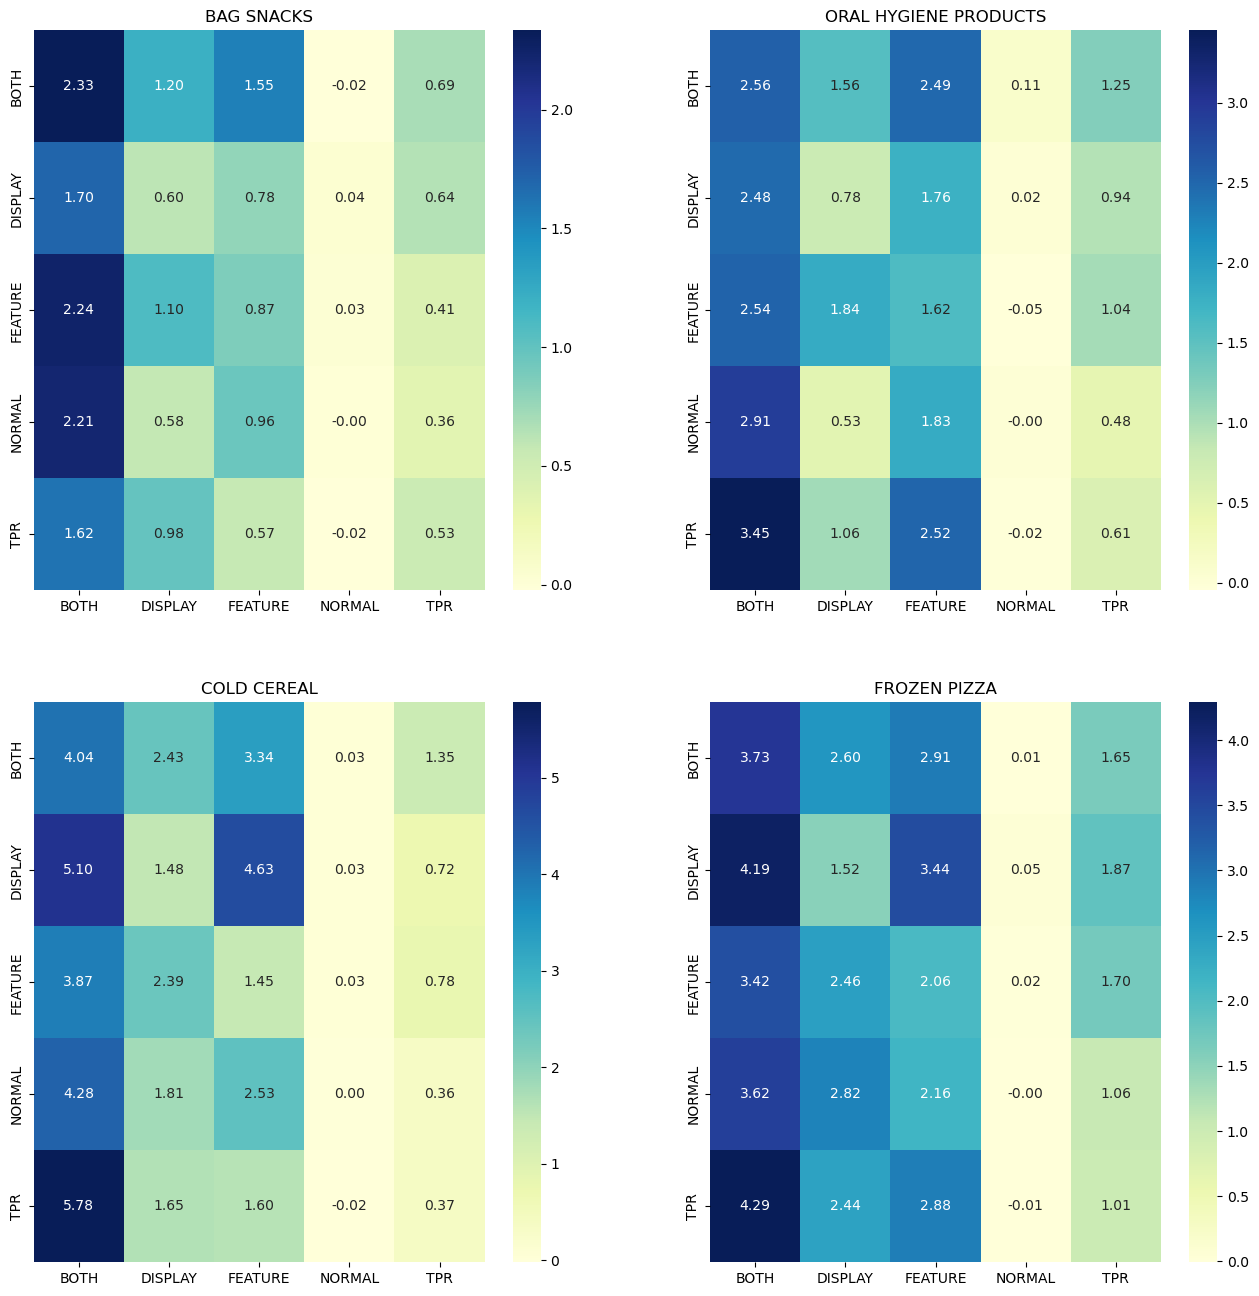

In [47]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
idx = 0
for i in range(2):
    for j in range(2):
        hmdata = data_upc2[data_upc2["CATEGORY"] == categories[idx]].pivot_table(values="SALES_INC_RATE", index="PREV_PROMO", columns="TYPE")
        sns.heatmap(data = hmdata
                    , annot = True
                    , cmap = 'YlGnBu'
                    , fmt='.2f'
                    , ax = axes[i, j])
        axes[i,j].set_title(categories[idx])
        axes[i,j].set_ylabel(None)
        axes[i,j].set_xlabel(None)
        idx += 1
plt.show()

On different categories, the effects of promotion seems to differ. Combination of display and feature promotions have a much higher effectiveness on "Cold Cereal" and "Frozen Pizza" categories. Feature promotion is weak for "Bag Snacks" category, compared to the rest of the categories.

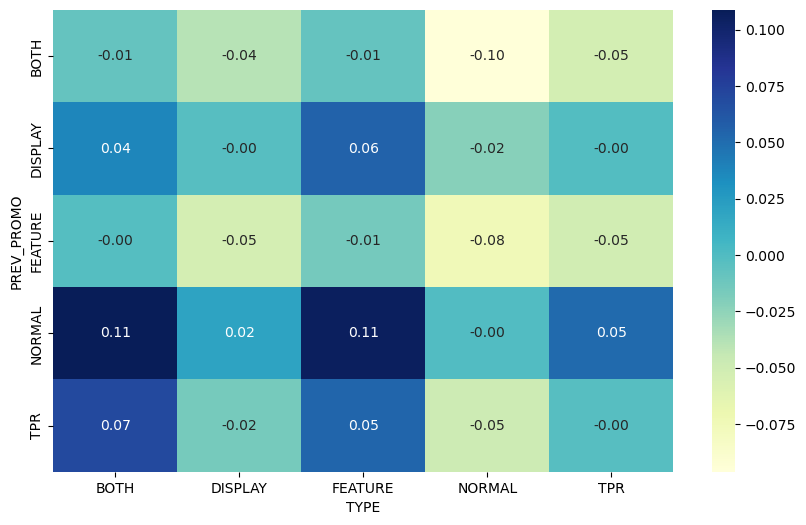

In [49]:
data_upc2['UPV_CHG'] = data_upc2['UPV'] - data_upc2['PREV_UPV']

plt.figure(figsize=(10,6))
sns.heatmap(data = (
                data_upc2.pivot_table(
                    values="UPV_CHG"
                    , index="PREV_PROMO"
                    , columns="TYPE")
            )
            , annot = True
            , cmap = 'YlGnBu'
            , fmt='.2f')
plt.show()

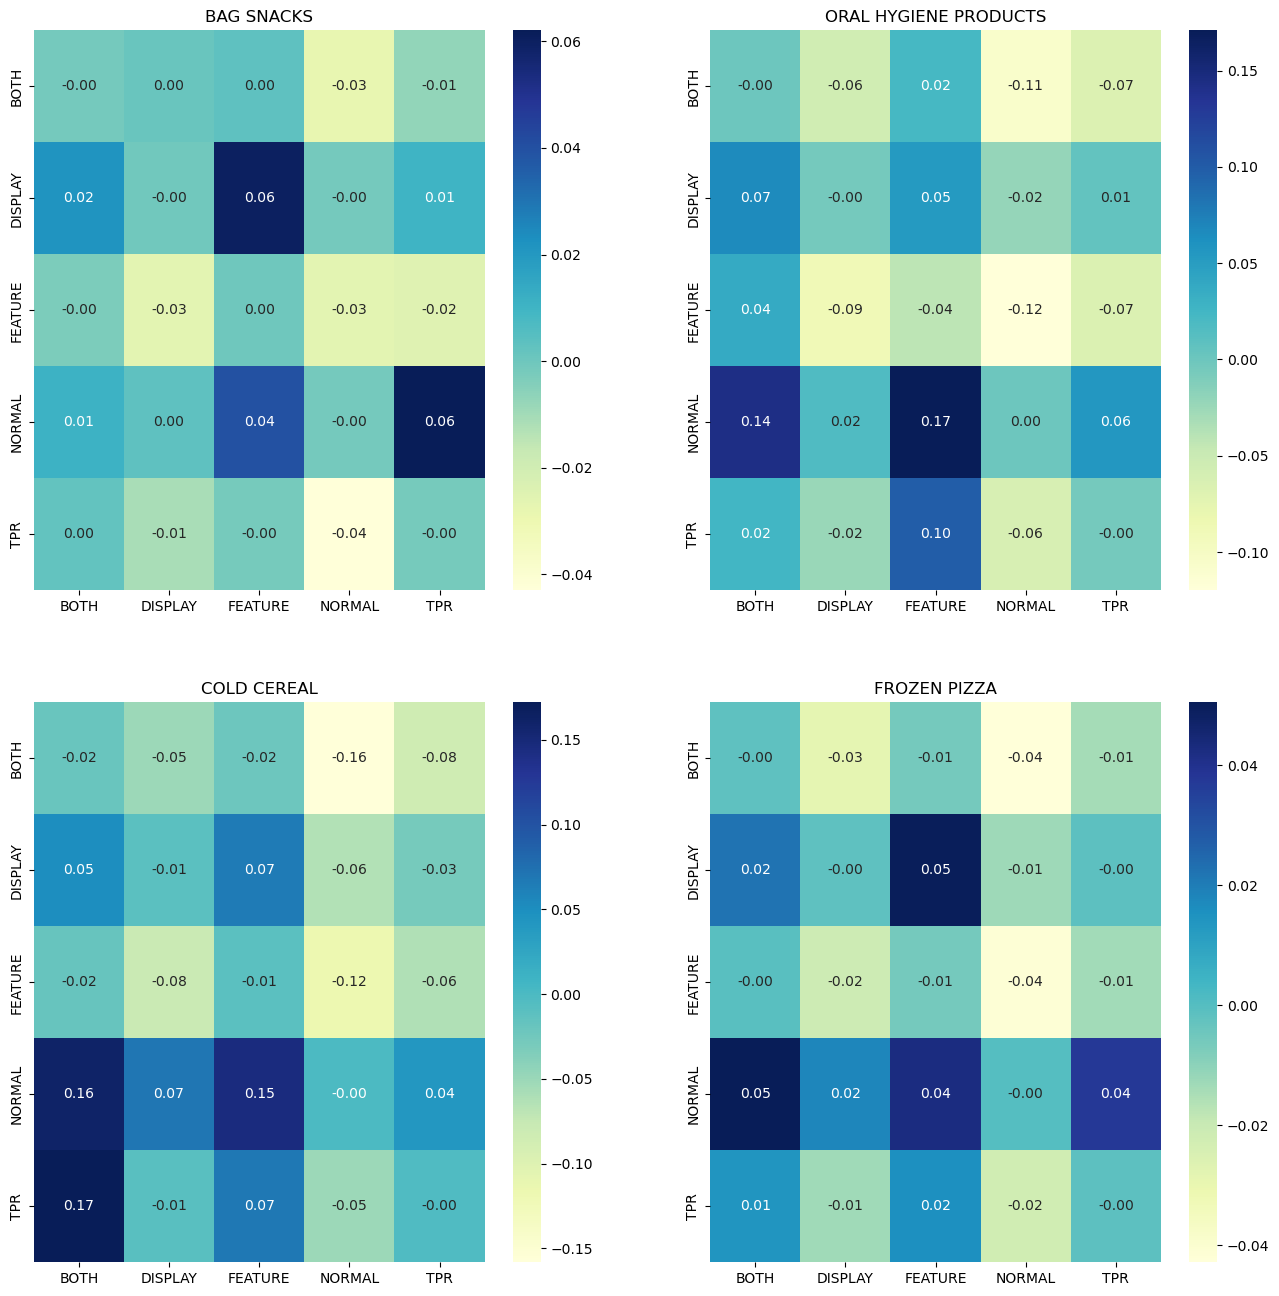

In [50]:
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
idx = 0
for i in range(2):
    for j in range(2):
        hmdata = data_upc2[data_upc2["CATEGORY"] == categories[idx]].pivot_table(values="UPV_CHG", index="PREV_PROMO", columns="TYPE")
        sns.heatmap(data = hmdata
                    , annot = True
                    , cmap = 'YlGnBu'
                    , fmt='.2f'
                    , ax = axes[i, j])
        axes[i,j].set_title(categories[idx])
        axes[i,j].set_ylabel(None)
        axes[i,j].set_xlabel(None)
        idx += 1
plt.show()

**By Category**

Certain categories experience an increase in units per visit, i.e. "Oral Hygiene Products" and "Cold Cereal" by around 0.14 to 0.17. This means that consumers buy more units when the products are put on promotion, especially under feature circular. These categories can be understood as products with lasting/long shelf-life and/or household/staples where consumers can stock up unlike snacks and pizzas.

The products under these categories should be featured in circular to increase sales targetted for loyal consumers.

### 4) Price elasticity of products

In [51]:
data_elas = data_upc2[data_upc2['PREV_PRICE'] < data_upc2['PRICE']].copy()
data_elas['SALES_INC_PREV'] = data_elas['UNITS'] - data_elas['PREV_SALES']
data_elas['SALES_INC_RATE_PREV'] = data_elas['SALES_INC_PREV'] / data_elas['PREV_SALES']

data_elas['PRICE_CHG'] = data_elas['PRICE'] - data_elas['PREV_PRICE']
data_elas['PRICE_CHG_RATE'] = data_elas['PRICE_CHG'] / data_elas['PREV_PRICE']
data_elas['PED'] = data_elas['SALES_INC_RATE_PREV'] / data_elas['PRICE_CHG_RATE']

data_elas.head()

WEEK_END_DATE  STORE_NUM         UPC  UNITS  VISITS  HHS   SPEND  PRICE  \
2     2011-08-24        367  1111009477      7       6    6   10.99   1.57   
4     2009-01-28        387  1111009477    107      93   93  148.73   1.39   
10    2009-02-04        613  1111009477     73      64   62   73.73   1.01   
15    2009-03-11        613  1111009477     35      33   33   35.00   1.00   
16    2009-03-25        613  1111009477     36      31   31   44.28   1.23   

    BASE_PRICE  FEATURE  ...  SALES_INC_RATE  PRICE_BIN  DISC_BIN  \
2         1.57        0  ...        0.000000        1_2       NaN   
4         1.39        0  ...        0.022293        1_2       NaN   
10        1.23        0  ...        0.580307        1_2     10-20   
15        1.23        0  ...       -0.242318        1_2     10-20   
16        1.23        0  ...       -0.220670        1_2       NaN   

    SALES_INC_BIN   UPV_CHG SALES_INC_PREV SALES_INC_RATE_PREV PRICE_CHG  \
2             NaN  0.055556           -3.0           -0.300000      0.05   
4           0_0.5  0.005801           20.0            0.229885      0.01   
10        0.5_1.0  0.093006            7.0            0.106061      0.03   
15            NaN -0.108885          -34.0           -0.492754      0.02   
16            NaN  0.000000            0.0            0.000000      0.05   

   PRICE_CHG_RATE        PED  
2        0.032895  -9.120000  
4        0.007246  31.724138  
10       0.030612   3.464646  
15       0.020408 -24.144928  
16       0.042373   0.000000  

[5 rows x 39 columns]

In [52]:
data_elas[(data_elas['PED'] != -np.inf) & (data_elas['PED'] != np.inf)].groupby(by=['CATEGORY', 'MANUFACTURER'], as_index=False)['PED'].agg(['count', 'median', 'mean', 'min', 'max']).dropna()

count    median       mean         min  \
CATEGORY              MANUFACTURER                                            
BAG SNACKS            FRITO LAY       2279 -1.353200   1.491318 -143.481481   
                      MKSL            1163  0.000000  23.286379 -186.000000   
                      PRIVATE LABEL  13116 -0.814304   4.632770 -142.521739   
                      SHULTZ          6792 -0.167642   1.257926 -102.375000   
                      SNYDER S        5599 -1.358182   3.293114 -191.333333   
COLD CEREAL           GENERAL MI     12970 -0.976721   1.236839 -312.347826   
                      KELLOGG         9312 -1.763066   0.436523 -259.857143   
                      POST FOODS      5895 -1.861224   0.294431 -250.000000   
                      PRIVATE LABEL  15660 -1.392769   7.440559 -232.750000   
                      QUAKER          6301 -1.771930  -2.303692 -256.666667   
FROZEN PIZZA          KING            1624 -1.356970  14.091314 -168.280000   
                      PRIVATE LABEL  15316 -1.430212  13.419015 -355.153846   
                      TOMBSTONE       7728 -2.047963   1.047360 -485.300000   
                      TONYS           6293 -1.583774   5.628819 -321.875000   
ORAL HYGIENE PRODUCTS CHATTEM         2023  0.000000   2.348396  -52.714286   
                      COLGATE           52  0.000000   0.168817   -3.495000   
                      P & G           4939 -1.050420   4.154422 -321.538462   
                      PRIVATE LABEL  10225 -0.547826   4.551392 -228.750000   
                      WARNER          4268 -1.395833   2.376181 -244.923077   

                                             max  
CATEGORY              MANUFACTURER                
BAG SNACKS            FRITO LAY       601.750000  
                      MKSL           1984.000000  
                      PRIVATE LABEL  1300.000000  
                      SHULTZ          489.250000  
                      SNYDER S       4750.000000  
COLD CEREAL           GENERAL MI     1458.187500  
                      KELLOGG        1580.500000  
                      POST FOODS     1029.000000  
                      PRIVATE LABEL  1535.500000  
                      QUAKER         1143.243243  
FROZEN PIZZA          KING           1947.000000  
                      PRIVATE LABEL  3150.000000  
                      TOMBSTONE      1597.333333  
                      TONYS          3402.000000  
ORAL HYGIENE PRODUCTS CHATTEM         449.000000  
                      COLGATE           6.990000  
                      P & G          1281.000000  
                      PRIVATE LABEL  4440.000000  
                      WARNER          745.500000

Price elasticity differs from manufacturer to manufacturer. Observably, some brands are perfectly price inelastic, indicating that these brands have either the following characteristics:

* Has no close substitutes, targetting different customer segments
* Already is a very low-priced items
* Or is considered a luxury items, or bought with considerations of factors outside of pricing

For these price inelastic brands, the store should not attempt to use pricing strategies for their promotion. Instead, the store can put these items on display without reducing the prices.

"Frozen Pizza" and "Cold Cereal" categories, however, seem to be suitable target categories for pricing strategies as they display more than proportional increase in demand relative to their price decrease.

### Store and Region

In [53]:
data_store = data_upc2.merge(store, how="inner", left_on="STORE_NUM", right_on="STORE_ID")
data_store.head()

WEEK_END_DATE  STORE_NUM         UPC  UNITS  VISITS  HHS  SPEND  PRICE  \
0    2009-01-14        367  1111009477     13      13   13  18.07   1.39   
1    2009-01-21        367  1111009477     24      23   23  33.36   1.39   
2    2011-08-24        367  1111009477      7       6    6  10.99   1.57   
3    2009-01-28        367  1111009477      7       7    7   9.52   1.36   
4    2009-02-04        367  1111009477     12      12   12  16.56   1.38   

   BASE_PRICE  FEATURE  ...  STORE_ID      STORE_NAME  ADDRESS_CITY_NAME  \
0        1.57        0  ...       367  15TH & MADISON          COVINGTON   
1        1.57        0  ...       367  15TH & MADISON          COVINGTON   
2        1.57        0  ...       367  15TH & MADISON          COVINGTON   
3        1.36        0  ...       367  15TH & MADISON          COVINGTON   
4        1.38        0  ...       367  15TH & MADISON          COVINGTON   

   ADDRESS_STATE_PROV_CODE  MSA_CODE SEG_VALUE_NAME PARKING_SPACE_QTY  \
0                       KY     17140          VALUE             196.0   
1                       KY     17140          VALUE             196.0   
2                       KY     17140          VALUE             196.0   
3                       KY     17140          VALUE             196.0   
4                       KY     17140          VALUE             196.0   

  SALES_AREA_SIZE_NUM AVG_WEEKLY_BASKETS PARKING_SPACE_QTY2  
0               24721       12706.532051                196  
1               24721       12706.532051                196  
2               24721       12706.532051                196  
3               24721       12706.532051                196  
4               24721       12706.532051                196  

[5 rows x 44 columns]

In [54]:
states = store['ADDRESS_STATE_PROV_CODE'].unique().tolist()
tiers = store['SEG_VALUE_NAME'].unique().tolist()

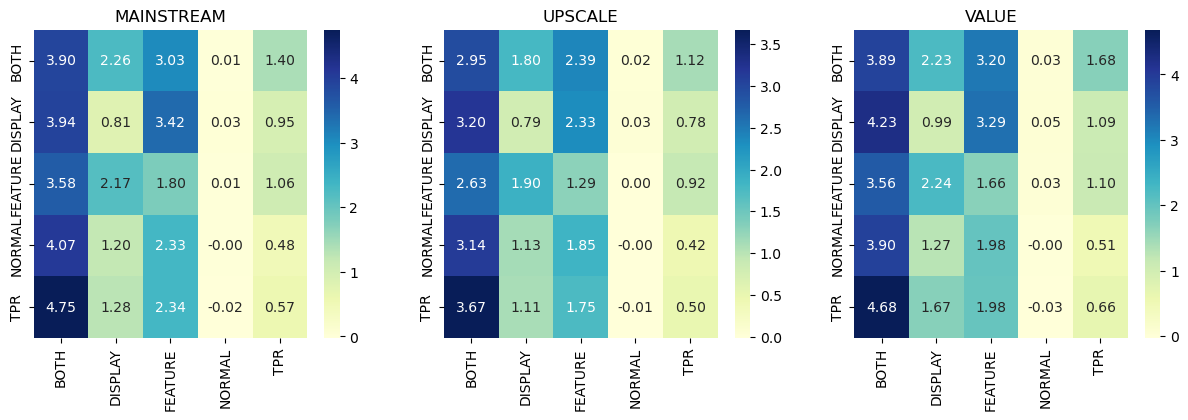

In [55]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i in range(3):
    hmdata = data_store[data_store["SEG_VALUE_NAME"] == tiers[i]].pivot_table(values="SALES_INC_RATE", index="PREV_PROMO", columns="TYPE")
    sns.heatmap(data = hmdata
                , annot = True
                , cmap = 'YlGnBu'
                , fmt='.2f'
                , ax = axes[i])
    axes[i].set_title(tiers[i])
    axes[i].set_ylabel(None)
    axes[i].set_xlabel(None)
plt.show()

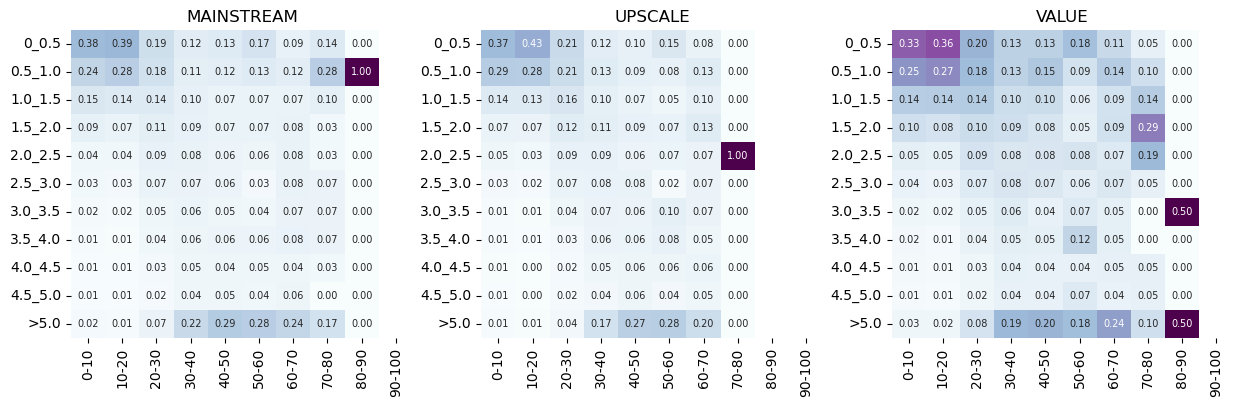

In [56]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i in range(3):
    hmdata = (data_store[data_store['SEG_VALUE_NAME'] == tiers[i]]
                      .pivot_table(values="SALES_INC_RATE"
                                   , index="SALES_INC_BIN"
                                   , columns="DISC_BIN"
                                   , aggfunc='count')
                      .apply(lambda x: x/sum(x), axis=0)
                 )
    sns.heatmap(data = hmdata
                , cmap = 'BuPu'
                , annot = True
                , annot_kws = {'size':7}
                , fmt = '.2f'
                , cbar = False
                , ax = axes[i])
    axes[i].set_title(tiers[i])
    axes[i].set_ylabel(None)
    axes[i].set_xlabel(None)
plt.show()

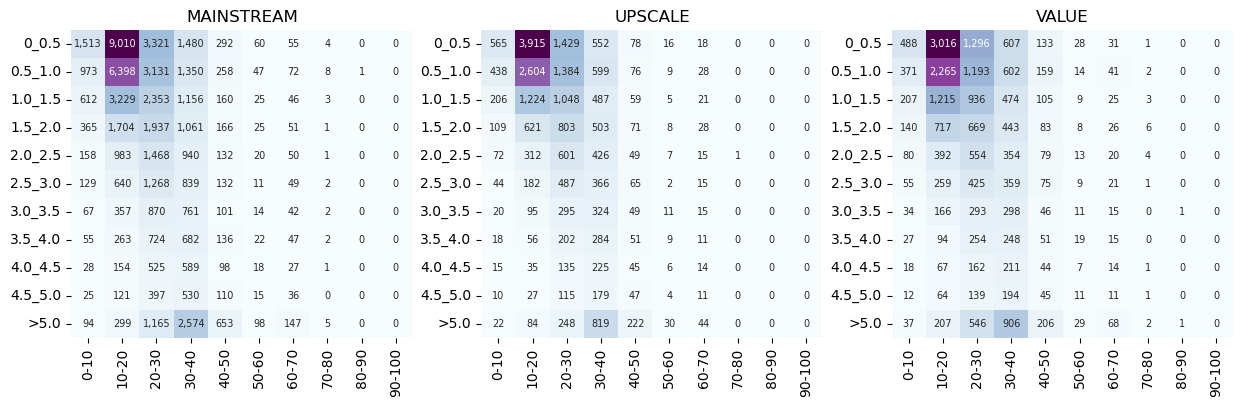

In [57]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i in range(3):
    hmdata = (data_store[data_store['SEG_VALUE_NAME'] == tiers[i]]
                      .pivot_table(values="SALES_INC_RATE"
                                   , index="SALES_INC_BIN"
                                   , columns="DISC_BIN"
                                   , aggfunc='count')
                 )
    sns.heatmap(data = hmdata
                , cmap = 'BuPu'
                , annot = True
                , annot_kws = {'size':7}
                , fmt = '#,'
                , cbar = False
                , ax = axes[i])
    axes[i].set_title(tiers[i])
    axes[i].set_ylabel(None)
    axes[i].set_xlabel(None)
plt.show()

In [58]:
data_elas2 = data_elas.merge(store, how="inner", left_on="STORE_NUM", right_on="STORE_ID")
data_elas2.head()

WEEK_END_DATE  STORE_NUM         UPC  UNITS  VISITS  HHS  SPEND  PRICE  \
0    2011-08-24        367  1111009477      7       6    6  10.99   1.57   
1    2009-02-04        367  1111009477     12      12   12  16.56   1.38   
2    2010-10-13        367  1111009477     17      16   15  23.46   1.38   
3    2010-11-03        367  1111009477     19      18   18  26.22   1.38   
4    2009-02-11        367  1111009477     16      14   14  24.00   1.50   

   BASE_PRICE  FEATURE  ...  STORE_ID      STORE_NAME  ADDRESS_CITY_NAME  \
0        1.57        0  ...       367  15TH & MADISON          COVINGTON   
1        1.38        0  ...       367  15TH & MADISON          COVINGTON   
2        1.38        0  ...       367  15TH & MADISON          COVINGTON   
3        1.38        0  ...       367  15TH & MADISON          COVINGTON   
4        1.50        0  ...       367  15TH & MADISON          COVINGTON   

   ADDRESS_STATE_PROV_CODE  MSA_CODE SEG_VALUE_NAME PARKING_SPACE_QTY  \
0                       KY     17140          VALUE             196.0   
1                       KY     17140          VALUE             196.0   
2                       KY     17140          VALUE             196.0   
3                       KY     17140          VALUE             196.0   
4                       KY     17140          VALUE             196.0   

  SALES_AREA_SIZE_NUM AVG_WEEKLY_BASKETS PARKING_SPACE_QTY2  
0               24721       12706.532051                196  
1               24721       12706.532051                196  
2               24721       12706.532051                196  
3               24721       12706.532051                196  
4               24721       12706.532051                196  

[5 rows x 49 columns]

In [59]:
data_elas2[(data_elas2['PED'] != -np.inf) & (data_elas2['PED'] != np.inf)].groupby(by=['CATEGORY', 'SEG_VALUE_NAME'], as_index=False)['PED'].agg(['count', 'median', 'mean', 'min', 'max']).dropna()

count    median      mean         min  \
CATEGORY              SEG_VALUE_NAME                                          
BAG SNACKS            MAINSTREAM      16790 -0.782440  4.183301 -191.333333   
                      UPSCALE          6685 -0.749507  3.240888 -182.500000   
                      VALUE            6101 -0.515775  4.920727 -168.000000   
COLD CEREAL           MAINSTREAM      28575 -1.556452  2.010982 -312.347826   
                      UPSCALE         11214 -1.436383  1.496003 -259.485714   
                      VALUE           11629 -1.486031  4.223202 -258.476190   
FROZEN PIZZA          MAINSTREAM      17526 -1.761176  8.142437 -485.300000   
                      UPSCALE          7303 -1.691884  9.491348 -357.677419   
                      VALUE            7029 -1.671171  9.344465 -421.090909   
ORAL HYGIENE PRODUCTS MAINSTREAM      12274 -0.841085  3.597616 -285.090909   
                      UPSCALE          5266 -0.840745  5.556745 -321.538462   
                      VALUE            4606 -0.610883  2.415444 -256.000000   

                                              max  
CATEGORY              SEG_VALUE_NAME               
BAG SNACKS            MAINSTREAM      4750.000000  
                      UPSCALE         1984.000000  
                      VALUE            894.000000  
COLD CEREAL           MAINSTREAM      1535.500000  
                      UPSCALE         1154.074074  
                      VALUE           1580.500000  
FROZEN PIZZA          MAINSTREAM      3402.000000  
                      UPSCALE         3150.000000  
                      VALUE           2911.333333  
ORAL HYGIENE PRODUCTS MAINSTREAM      1465.000000  
                      UPSCALE         4440.000000  
                      VALUE            898.000000

In [60]:
data_elas2[(data_elas2['PED'] != -np.inf) & (data_elas2['PED'] != np.inf)].groupby(by=['ADDRESS_STATE_PROV_CODE', 'SEG_VALUE_NAME']).agg({'PED':['count', 'median'], 'UPV':['median', 'mean'], 'UNITS':['mean', 'sum']}).dropna()

PED                 UPV            \
                                        count    median    median      mean   
ADDRESS_STATE_PROV_CODE SEG_VALUE_NAME                                        
IN                      MAINSTREAM       1971 -1.532967  1.096774  1.154561   
KY                      MAINSTREAM       5799 -1.416510  1.097561  1.150500   
                        VALUE            1535 -0.929461  1.074074  1.160973   
OH                      MAINSTREAM      29708 -1.425073  1.090909  1.151046   
                        UPSCALE         13704 -1.330000  1.090909  1.148432   
                        VALUE           12465 -1.281181  1.066667  1.138142   
TX                      MAINSTREAM      37687 -1.383399  1.055556  1.125281   
                        UPSCALE         16764 -1.310764  1.058538  1.127939   
                        VALUE           15365 -1.337214  1.016129  1.126045   

                                            UNITS          
                                             mean     sum  
ADDRESS_STATE_PROV_CODE SEG_VALUE_NAME                     
IN                      MAINSTREAM      26.252156   51743  
KY                      MAINSTREAM      31.588377  183181  
                        VALUE           12.640391   19403  
OH                      MAINSTREAM      26.899758  799138  
                        UPSCALE         37.184618  509578  
                        VALUE           20.089691  250418  
TX                      MAINSTREAM      17.393982  655527  
                        UPSCALE         17.812455  298608  
                        VALUE           14.895542  228870

## Deep-dive into specific category and store

***

In [61]:
data_store.groupby(by=["SEG_VALUE_NAME"]).agg({'STORE_NUM':'nunique', 'VISITS':'mean', 'UNITS':['sum','mean'], 'PRICE':'median', 'SPEND':'median'})

STORE_NUM     VISITS    UNITS             PRICE  SPEND
                 nunique       mean      sum       mean median median
SEG_VALUE_NAME                                                       
MAINSTREAM            43  16.987454  5850764  19.491826   2.99  31.90
UPSCALE               17  20.371980  2813616  23.153522   3.06  40.59
VALUE                 19  13.996283  1816610  15.849532   2.99  23.03

In [62]:
# Check for mainstrem stores that have high sales
store[store['SEG_VALUE_NAME'] == "MAINSTREAM"].sort_values(by="AVG_WEEKLY_BASKETS", ascending=False).head()

STORE_ID  STORE_NAME ADDRESS_CITY_NAME ADDRESS_STATE_PROV_CODE  MSA_CODE  \
36     25027  CINCINNATI        CINCINNATI                      OH     17140   
45     21237     LEBANON           LEBANON                      OH     17140   
12       623     HOUSTON           HOUSTON                      TX     26420   
48     25229     CYPRESS           CYPRESS                      TX     26420   
34     17615   SUGARLAND        SUGAR LAND                      TX     26420   

   SEG_VALUE_NAME  PARKING_SPACE_QTY  SALES_AREA_SIZE_NUM  AVG_WEEKLY_BASKETS  \
36     MAINSTREAM                NaN                62656        43892.923077   
45     MAINSTREAM                NaN                86517        38465.128205   
12     MAINSTREAM                NaN                46930        36740.692308   
48     MAINSTREAM                NaN                59241        34977.435897   
34     MAINSTREAM                NaN                48632        32490.858974   

    PARKING_SPACE_QTY2  
36                   0  
45                   0  
12                   0  
48                   0  
34                   0

In [63]:
# View CINCINNATI store (ID 25027) for the product offerings and their sales performance
data_store[data_store['STORE_NUM'] == 25027].groupby(by=["CATEGORY", "MANUFACTURER", "UPC", "DESCRIPTION"], as_index=False).agg({'UNITS':['mean', 'median']})

CATEGORY   MANUFACTURER          UPC  \
                                                        
0              BAG SNACKS      FRITO LAY   2840002333   
1              BAG SNACKS      FRITO LAY   2840004768   
2              BAG SNACKS      FRITO LAY   2840004770   
3              BAG SNACKS           MKSL   7110410455   
4              BAG SNACKS           MKSL   7110410470   
5              BAG SNACKS           MKSL   7110410471   
6              BAG SNACKS  PRIVATE LABEL   1111009477   
7              BAG SNACKS  PRIVATE LABEL   1111009497   
8              BAG SNACKS  PRIVATE LABEL   1111009507   
9              BAG SNACKS         SHULTZ   7027312504   
10             BAG SNACKS         SHULTZ   7027316204   
11             BAG SNACKS         SHULTZ   7027316404   
12             BAG SNACKS       SNYDER S   7797502248   
13             BAG SNACKS       SNYDER S   7797508004   
14             BAG SNACKS       SNYDER S   7797508006   
15            COLD CEREAL     GENERAL MI   1600027527   
16            COLD CEREAL     GENERAL MI   1600027528   
17            COLD CEREAL     GENERAL MI   1600027564   
18            COLD CEREAL        KELLOGG   3800031829   
19            COLD CEREAL        KELLOGG   3800031838   
20            COLD CEREAL        KELLOGG   3800039118   
21            COLD CEREAL     POST FOODS  88491201426   
22            COLD CEREAL     POST FOODS  88491201427   
23            COLD CEREAL     POST FOODS  88491212971   
24            COLD CEREAL  PRIVATE LABEL   1111085319   
25            COLD CEREAL  PRIVATE LABEL   1111085345   
26            COLD CEREAL  PRIVATE LABEL   1111085350   
27            COLD CEREAL         QUAKER   3000006340   
28            COLD CEREAL         QUAKER   3000006560   
29            COLD CEREAL         QUAKER   3000006610   
30           FROZEN PIZZA           KING   2066200530   
31           FROZEN PIZZA           KING   2066200531   
32           FROZEN PIZZA           KING   2066200532   
33           FROZEN PIZZA  PRIVATE LABEL   1111087395   
34           FROZEN PIZZA  PRIVATE LABEL   1111087396   
35           FROZEN PIZZA  PRIVATE LABEL   1111087398   
36           FROZEN PIZZA      TOMBSTONE   7192100336   
37           FROZEN PIZZA      TOMBSTONE   7192100337   
38           FROZEN PIZZA      TOMBSTONE   7192100339   
39           FROZEN PIZZA          TONYS   7218063052   
40           FROZEN PIZZA          TONYS   7218063979   
41           FROZEN PIZZA          TONYS   7218063983   
42  ORAL HYGIENE PRODUCTS        CHATTEM   4116709428   
43  ORAL HYGIENE PRODUCTS        CHATTEM   4116709448   
44  ORAL HYGIENE PRODUCTS        CHATTEM   4116709565   
45  ORAL HYGIENE PRODUCTS        COLGATE   3500068914   
46  ORAL HYGIENE PRODUCTS          P & G   3700019521   
47  ORAL HYGIENE PRODUCTS          P & G   3700031613   
48  ORAL HYGIENE PRODUCTS          P & G   3700044982   
49  ORAL HYGIENE PRODUCTS  PRIVATE LABEL   1111035398   
50  ORAL HYGIENE PRODUCTS  PRIVATE LABEL   1111038078   
51  ORAL HYGIENE PRODUCTS  PRIVATE LABEL   1111038080   
52  ORAL HYGIENE PRODUCTS         WARNER  31254742725   
53  ORAL HYGIENE PRODUCTS         WARNER  31254742735   
54  ORAL HYGIENE PRODUCTS         WARNER  31254742835   

                  DESCRIPTION       UNITS         
                                     mean median  
0    RLDGLD BRAIDED HONEY WHT   10.391026    9.0  
1    RLDGLD TINY TWISTS PRTZL   26.923077   24.0  
2       RLDGLD PRETZEL STICKS   11.574194    9.0  
3    MKSL MINI TWIST PRETZELS   10.538961    9.0  
4         MKSL DUTCH PRETZELS   11.794872   12.0  
5         MKSL PRETZEL STICKS    8.781457    9.0  
6      PL MINI TWIST PRETZELS  148.346154  147.0  
7           PL PRETZEL STICKS  111.102564  102.0  
8           PL TWIST PRETZELS   66.647436   62.0  
9         SHURGD PRETZEL RODS   46.064103   46.0  
10       SHURGD MINI PRETZELS   66.365385   67.0  
11      SHURGD PRETZEL STICKS   61.269231   60.0  
12         SNYDR PRETZEL RODS   21.237179   18.5  
13

### Retreive geographical locations

In [64]:
# Import additional relevant libraries to get geolocation data
import requests
import urllib.parse
import time

In [65]:
# Initialise geolocations dictionary
geolocations = {}

In [66]:
# Iterate through the list of stores
for idx, row in store.iterrows():
    address = row['STORE_NAME'] + ", " + row['ADDRESS_CITY_NAME'] + ", " + row['ADDRESS_STATE_PROV_CODE'] + ", UNITED STATES"
    
    # Skip if geolocation is already cached
    if row['STORE_ID'] not in geolocations:
        url = 'https://nominatim.openstreetmap.org/search/' + urllib.parse.quote(address) +'?format=json'
        response = requests.get(url).json()
        
        if len(response) > 0:
            print("Retreiving:\t", idx, "\t", address)
            geolocations[row['STORE_ID']] = (float(response[0]["lat"]), float(response[0]["lon"]))
        else:
            print("No response:\t", idx, "\t", address)
            
        # Delay loop by 1 second to adhere to the Geocoding Usage Policy
        time.sleep(1)
    else:
        print("Retreived:\t", idx, "\t", address)
        continue

Retreiving:	 0 	 SILVERLAKE, ERLANGER, KY, UNITED STATES
Retreiving:	 1 	 ANDERSON TOWNE CTR, CINCINNATI, OH, UNITED STATES
Retreiving:	 2 	 WARSAW AVENUE, CINCINNATI, OH, UNITED STATES
Retreiving:	 3 	 KINGWOOD, KINGWOOD, TX, UNITED STATES
No response:	 4 	 AT WARD ROAD, BAYTOWN, TX, UNITED STATES
Retreiving:	 5 	 RICHARDSON, RICHARDSON, TX, UNITED STATES
Retreiving:	 6 	 MCKINNEY, MCKINNEY, TX, UNITED STATES
No response:	 7 	 KROGER JUNCTION S/C, PASADENA, TX, UNITED STATES
Retreiving:	 8 	 HOUSTON, HOUSTON, TX, UNITED STATES
Retreiving:	 9 	 FRISCO, FRISCO, TX, UNITED STATES
Retreiving:	 10 	 PINEWOOD, DAYTON, OH, UNITED STATES
Retreiving:	 11 	 DAYTON, DAYTON, OH, UNITED STATES
Retreiving:	 12 	 HOUSTON, HOUSTON, TX, UNITED STATES
Retreiving:	 13 	 NORWOOD, ARLINGTON, TX, UNITED STATES
No response:	 14 	 SWEETWATER PLAZA, SUGAR LAND, TX, UNITED STATES
Retreiving:	 15 	 AT EASTEX FRWY, HOUSTON, TX, UNITED STATES
Retreiving:	 16 	 VANDALIA, VANDALIA, OH, UNITED STATES
Retreiving:	 17

### Focus on store 25027 and surrounding stores (Cincinnati, OH)

In [67]:
storelist = store[store['ADDRESS_CITY_NAME'] == "CINCINNATI"]["STORE_ID"].unique().tolist()
set(storelist).intersection(set([i for i in geolocations.keys()]))

{2277, 4259, 8035, 15547, 21213, 23055, 24991, 25027}

In [68]:
# We noted that there was an outlier on sture 25027 on the UPH metric
# UPC: 3700019521 --> Toothpaste BRAND P&G, DESCRIPTION CREST PH WHTG CLN MINT TP
# Reasonable 10 units purchase to stock up on household goods
uph_outliers[uph_outliers['STORE_NUM'] == 25027]

WEEK_END_DATE  STORE_NUM         UPC  UNITS  VISITS  HHS  SPEND  PRICE  \
508200    2011-11-30      25027  3700019521     10       3    1   10.0    1.0   

        BASE_PRICE  FEATURE  DISPLAY  TPR_ONLY       UPV  VPH   UPH  
508200        3.46        0        0         1  3.333333  3.0  10.0

In [69]:
# Find the STORE_ID without geolocation data
for i in storelist:
    if i in geolocations:
        print(i, geolocations[i])
    else:
        print(i, "not found")

2277 (39.0759032, -84.3502337)
4259 (39.1101915, -84.5665028)
8035 (39.1115038, -84.5143927)
25027 (39.13889825, -84.5084999563633)
23055 (39.1258163, -84.4905319)
24991 (39.1395957, -84.4423972)
9825 not found
15547 (39.107267, -84.567511)
21213 (39.11946075, -84.4462115)


In [70]:
# Check the details of STORE_ID 9825, without geolocation data
store[store['STORE_ID'] == 9825]

STORE_ID STORE_NAME ADDRESS_CITY_NAME ADDRESS_STATE_PROV_CODE  MSA_CODE  \
64      9825       DENT        CINCINNATI                      OH     17140   

   SEG_VALUE_NAME  PARKING_SPACE_QTY  SALES_AREA_SIZE_NUM  AVG_WEEKLY_BASKETS  \
64     MAINSTREAM                NaN                54124        29915.903846   

    PARKING_SPACE_QTY2  
64                   0

In [71]:
# From manually searching using google maps,
# we can obtain the geolocation as follows
# lat, lon = 39.1862420851328, -84.65149928913347

# which we will now input into the dictionary
geolocations[9825] = (39.1862420851328, -84.65149928913347)

In [72]:
cincinnati_store = store[store['ADDRESS_CITY_NAME'] == "CINCINNATI"].copy()
cincinnati_store['GEO'] = cincinnati_store['STORE_ID'].apply(lambda x: geolocations.get(x))
cincinnati_store['LAT'] = cincinnati_store['GEO'].apply(lambda x: x[0] )
cincinnati_store['LON'] = cincinnati_store['GEO'].apply(lambda x: x[1])
cincinnati_store.head()

STORE_ID            STORE_NAME ADDRESS_CITY_NAME ADDRESS_STATE_PROV_CODE  \
1       2277    ANDERSON TOWNE CTR        CINCINNATI                      OH   
2       4259         WARSAW AVENUE        CINCINNATI                      OH   
30      8035        OVER-THE-RHINE        CINCINNATI                      OH   
36     25027            CINCINNATI        CINCINNATI                      OH   
56     23055  WALNUT HILLS/PEEBLES        CINCINNATI                      OH   

    MSA_CODE SEG_VALUE_NAME  PARKING_SPACE_QTY  SALES_AREA_SIZE_NUM  \
1      17140        UPSCALE                NaN                81958   
2      17140          VALUE                NaN                48813   
30     17140          VALUE               17.0                10788   
36     17140     MAINSTREAM                NaN                62656   
56     17140          VALUE              239.0                22920   

    AVG_WEEKLY_BASKETS  PARKING_SPACE_QTY2                               GEO  \
1         54052.519231                   0         (39.0759032, -84.3502337)   
2         31177.333333                   0         (39.1101915, -84.5665028)   
30        10434.705128                  17         (39.1115038, -84.5143927)   
36        43892.923077                   0  (39.13889825, -84.5084999563633)   
56        12999.724359                 239         (39.1258163, -84.4905319)   

          LAT        LON  
1   39.075903 -84.350234  
2   39.110191 -84.566503  
30  39.111504 -84.514393  
36  39.138898 -84.508500  
56  39.125816 -84.490532

In [73]:
# Now to calculate the hemispherical distance between two stores
# using haversine distance calculation defined in the function below
from math import sin, cos, sqrt, atan2, radians

def haversine_distance(point1, point2):
    # Approximate radius of earth in km
    R = 6373.0
    
    # Convert points to radian
    lat1 = radians(point1[0])
    lon1 = radians(point1[1])
    lat2 = radians(point2[0])
    lon2 = radians(point2[1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c
    
    return distance

In [74]:
# Get distance from the selected store
cincinnati_store['DIST_FROM_25027'] = cincinnati_store['GEO'].apply(lambda x: haversine_distance(x, geolocations[25027]))
display(cincinnati_store[['STORE_ID', 'STORE_NAME', 'SEG_VALUE_NAME', 'AVG_WEEKLY_BASKETS', 'DIST_FROM_25027']])

STORE_ID            STORE_NAME SEG_VALUE_NAME  AVG_WEEKLY_BASKETS  \
1       2277    ANDERSON TOWNE CTR        UPSCALE        54052.519231   
2       4259         WARSAW AVENUE          VALUE        31177.333333   
30      8035        OVER-THE-RHINE          VALUE        10434.705128   
36     25027            CINCINNATI     MAINSTREAM        43892.923077   
56     23055  WALNUT HILLS/PEEBLES          VALUE        12999.724359   
57     24991             HYDE PARK        UPSCALE        50618.993590   
64      9825                  DENT     MAINSTREAM        29915.903846   
65     15547              WOODLAWN     MAINSTREAM        27357.570513   
74     21213            MT. CARMEL     MAINSTREAM        14511.788462   

    DIST_FROM_25027  
1         15.352310  
2          5.936826  
30         3.089214  
36         0.000000  
56         2.126193  
57         5.703308  
64        13.409920  
65         6.189391  
74         5.793051

In [75]:
import plotly.express as px

fig = px.scatter_mapbox(
    data_frame = cincinnati_store,
    lat = "LAT",
    lon = "LON",
    color = "STORE_NAME",
    size = "AVG_WEEKLY_BASKETS",
    center = {'lat': np.mean(cincinnati_store["LAT"]),
              'lon': np.mean(cincinnati_store["LON"])},
    hover_name = [f'Store {k}' for k in cincinnati_store['STORE_ID'].values],
    text = [f'Store {k[0]}<br><{k[1]}>' for k in cincinnati_store[['STORE_ID', 'SEG_VALUE_NAME']].values],
    custom_data = ["AVG_WEEKLY_BASKETS", "DIST_FROM_25027"],
    mapbox_style = 'carto-positron',
    zoom = 10.5
)

fig.update_traces(hovertemplate='<b>%{text}</b><br>Avg. sales: %{customdata[0]:,.2f}<br>Distance: %{customdata[1]:.2f}km') 

fig.show()

In [76]:
data_store_25027 =  data_store[data_store['STORE_NUM'] == 25027].copy()
data_store_25027['CATEGORY'] = data_store_25027['CATEGORY'].astype('category')
data_store_25027['MANUFACTURER'] = data_store_25027['MANUFACTURER'].astype('category')
data_store_25027['UPC'] = data_store_25027['UPC'].astype('category')
print(data_store_25027.shape)
data_store_25027.head()

(7915, 44)


WEEK_END_DATE  STORE_NUM         UPC  UNITS  VISITS  HHS   SPEND  \
367614    2009-01-14      25027  1111009477    166     151  149  229.08   
367615    2009-01-21      25027  1111009477    175     156  154  241.50   
367616    2009-01-28      25027  1111009477    158     144  139  218.04   
367617    2009-02-04      25027  1111009477    184     163  163  252.08   
367618    2009-02-11      25027  1111009477    199     170  164  294.52   

        PRICE  BASE_PRICE  FEATURE  ...  STORE_ID  STORE_NAME  \
367614   1.38        1.49        0  ...     25027  CINCINNATI   
367615   1.38        1.49        0  ...     25027  CINCINNATI   
367616   1.38        1.49        0  ...     25027  CINCINNATI   
367617   1.37        1.49        0  ...     25027  CINCINNATI   
367618   1.48        1.49        0  ...     25027  CINCINNATI   

        ADDRESS_CITY_NAME  ADDRESS_STATE_PROV_CODE  MSA_CODE SEG_VALUE_NAME  \
367614         CINCINNATI                       OH     17140     MAINSTREAM   
367615         CINCINNATI                       OH     17140     MAINSTREAM   
367616         CINCINNATI                       OH     17140     MAINSTREAM   
367617         CINCINNATI                       OH     17140     MAINSTREAM   
367618         CINCINNATI                       OH     17140     MAINSTREAM   

       PARKING_SPACE_QTY SALES_AREA_SIZE_NUM AVG_WEEKLY_BASKETS  \
367614               NaN               62656       43892.923077   
367615               NaN               62656       43892.923077   
367616               NaN               62656       43892.923077   
367617               NaN               62656       43892.923077   
367618               NaN               62656       43892.923077   

       PARKING_SPACE_QTY2  
367614                  0  
367615                  0  
367616                  0  
367617                  0  
367618                  0  

[5 rows x 44 columns]

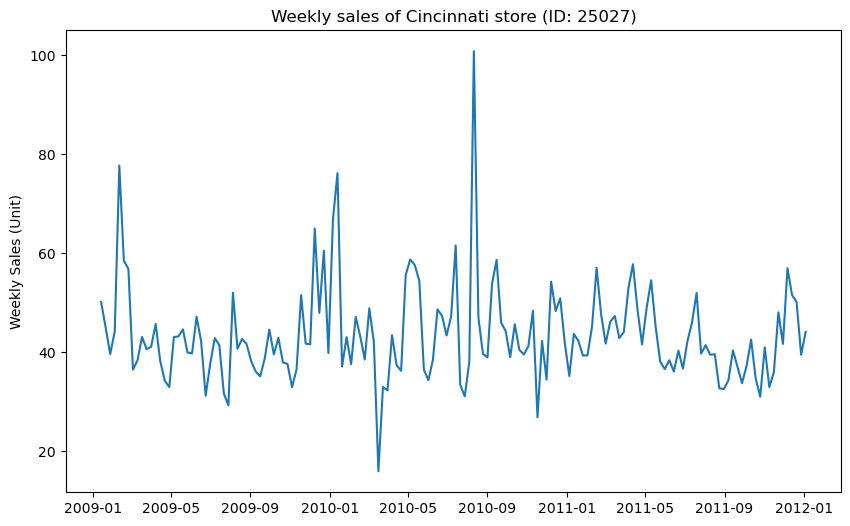

In [77]:
plt.figure(figsize=(10,6))

sns.lineplot(data=data_store_25027
             , x="WEEK_END_DATE"
             , y="UNITS"
             , errorbar=None
            )

plt.title("Weekly sales of Cincinnati store (ID: 25027)")
plt.xlabel(None)
plt.ylabel("Weekly Sales (Unit)")

plt.show()

In [78]:
data_store_25027.columns

Index(['WEEK_END_DATE', 'STORE_NUM', 'UPC', 'UNITS', 'VISITS', 'HHS', 'SPEND',
       'PRICE', 'BASE_PRICE', 'FEATURE', 'DISPLAY', 'TPR_ONLY', 'UPV', 'VPH',
       'UPH', 'DESCRIPTION', 'MANUFACTURER', 'CATEGORY', 'SUB_CATEGORY',
       'PRODUCT_SIZE', 'TYPE', 'DISCOUNT', 'DISC_RATE', 'PREV_PROMO',
       'PREV_SALES', 'PREV_PRICE', 'PREV_UPV', 'AVG_SALES', 'SALES_INC',
       'SALES_INC_RATE', 'PRICE_BIN', 'DISC_BIN', 'SALES_INC_BIN', 'UPV_CHG',
       'STORE_ID', 'STORE_NAME', 'ADDRESS_CITY_NAME',
       'ADDRESS_STATE_PROV_CODE', 'MSA_CODE', 'SEG_VALUE_NAME',
       'PARKING_SPACE_QTY', 'SALES_AREA_SIZE_NUM', 'AVG_WEEKLY_BASKETS',
       'PARKING_SPACE_QTY2'],
      dtype='object')

In [79]:
data_store_25027.to_csv('data25027.csv', encoding='utf-8-sig', index=False)

### Deep-dive into selected UPCs under Oral Hygiene (Mouthwash 1L ~ 1.5L)

In [80]:
#product[product['CATEGORY'] == 'ORAL HYGIENE PRODUCTS']
select_upcs = [1111035398, 3700031613, 3700044982, 31254742735, 31254742835]
product[product['UPC'].isin(select_upcs)]

UPC                DESCRIPTION   MANUFACTURER  \
3    1111035398   PL BL MINT ANTSPTC RINSE  PRIVATE LABEL   
29   3700031613  SCOPE ORIG MINT MOUTHWASH          P & G   
30   3700044982    CREST PH CLN MINT RINSE          P & G   
53  31254742735  LSTRNE CL MINT ANTSPTC MW         WARNER   
54  31254742835  LSTRNE FRS BRST ANTSPC MW         WARNER   

                 CATEGORY                 SUB_CATEGORY PRODUCT_SIZE  
3   ORAL HYGIENE PRODUCTS     MOUTHWASHES (ANTISEPTIC)       1.5 LT  
29  ORAL HYGIENE PRODUCTS  MOUTHWASH/RINSES AND SPRAYS         1 LT  
30  ORAL HYGIENE PRODUCTS     MOUTHWASHES (ANTISEPTIC)         1 LT  
53  ORAL HYGIENE PRODUCTS     MOUTHWASHES (ANTISEPTIC)         1 LT  
54  ORAL HYGIENE PRODUCTS     MOUTHWASHES (ANTISEPTIC)         1 LT

In [81]:
df = data_store_25027[data_store_25027['UPC'].isin(select_upcs)].copy()

In [82]:
with pd.option_context('display.float_format', '{:.2%}'.format):
    display(df[['WEEK_END_DATE', 'UPC', 'UNITS', 'PRICE', 'FEATURE', 'DISPLAY', 'TPR_ONLY', "TYPE"]]
            .pivot_table(index=["UPC"], values=["FEATURE", "DISPLAY", "TPR_ONLY"]))

DISPLAY  FEATURE  TPR_ONLY
UPC                                    
1111035398     0.68%    0.00%    10.81%
3700031613     5.30%    5.30%    17.22%
3700044982    18.92%    3.38%    16.22%
31254742735   11.69%    5.19%    13.64%
31254742835    5.92%    5.26%    17.76%

In [83]:
df.groupby(by=["UPC", "TYPE"]).agg(COUNT=('TYPE','count')).query("COUNT > 0").pivot_table(index=["UPC"], columns=["TYPE"], values=["COUNT"])

COUNT                             
TYPE         BOTH DISPLAY FEATURE NORMAL   TPR
UPC                                           
1111035398    NaN     1.0     NaN  131.0  16.0
3700031613    NaN     8.0     8.0  109.0  26.0
3700044982    2.0    26.0     3.0   93.0  24.0
31254742735   3.0    15.0     5.0  110.0  21.0
31254742835   4.0     5.0     4.0  112.0  27.0

In [84]:
product[product['CATEGORY'] == "ORAL HYGIENE PRODUCTS"]

UPC                DESCRIPTION   MANUFACTURER  \
3    1111035398   PL BL MINT ANTSPTC RINSE  PRIVATE LABEL   
4    1111038078   PL BL MINT ANTSPTC RINSE  PRIVATE LABEL   
5    1111038080   PL ANTSPTC SPG MNT MTHWS  PRIVATE LABEL   
27   3500068914        COLG SPEARMINT WISP        COLGATE   
28   3700019521  CREST PH WHTG CLN MINT TP          P & G   
29   3700031613  SCOPE ORIG MINT MOUTHWASH          P & G   
30   3700044982    CREST PH CLN MINT RINSE          P & G   
34   4116709428   ACT MINT A/CAV FLUOR RNS        CHATTEM   
35   4116709448  ACT KIDS BBLGUM FLUOR RNS        CHATTEM   
36   4116709565  ACT RSTR CL SPLSH MINT MW        CHATTEM   
52  31254742725  LSTRNE CL MINT ANTSPTC MW         WARNER   
53  31254742735  LSTRNE CL MINT ANTSPTC MW         WARNER   
54  31254742835  LSTRNE FRS BRST ANTSPC MW         WARNER   

                 CATEGORY                 SUB_CATEGORY PRODUCT_SIZE  
3   ORAL HYGIENE PRODUCTS     MOUTHWASHES (ANTISEPTIC)       1.5 LT  
4   ORAL HYGIENE PRODUCTS     MOUTHWASHES (ANTISEPTIC)       500 ML  
5   ORAL HYGIENE PRODUCTS     MOUTHWASHES (ANTISEPTIC)       500 ML  
27  ORAL HYGIENE PRODUCTS  MOUTHWASH/RINSES AND SPRAYS        16 CT  
28  ORAL HYGIENE PRODUCTS  MOUTHWASH/RINSES AND SPRAYS       4.2 OZ  
29  ORAL HYGIENE PRODUCTS  MOUTHWASH/RINSES AND SPRAYS         1 LT  
30  ORAL HYGIENE PRODUCTS     MOUTHWASHES (ANTISEPTIC)         1 LT  
34  ORAL HYGIENE PRODUCTS  MOUTHWASH/RINSES AND SPRAYS       532 ML  
35  ORAL HYGIENE PRODUCTS  MOUTHWASH/RINSES AND SPRAYS       532 ML  
36  ORAL HYGIENE PRODUCTS     MOUTHWASHES (ANTISEPTIC)       532 ML  
52  ORAL HYGIENE PRODUCTS     MOUTHWASHES (ANTISEPTIC)       500 ML  
53  ORAL HYGIENE PRODUCTS     MOUTHWASHES (ANTISEPTIC)         1 LT  
54  ORAL HYGIENE PRODUCTS     MOUTHWASHES (ANTISEPTIC)         1 LT

"PRIVATE LABEL" products are rarely displayed or featured, which makes sense since they already are perceived as "low-end" goods. Marketing these products would not have huge impact on sales.

In general, the branded products have ~5% exposure to "FEATURE" type promotions, while "DISPLAY" type promotions are more common and easier to set up. In general still ranges between ~5% up to ~18% for the selected products. 

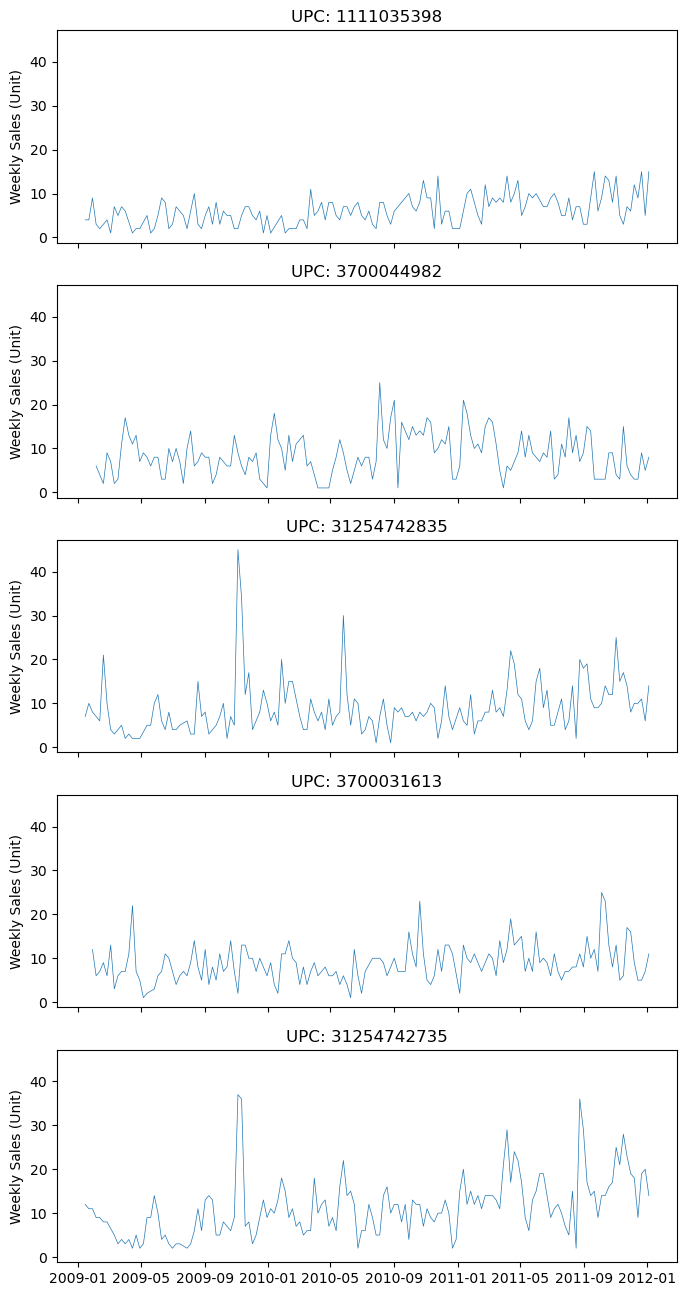

In [85]:
fig, ax = plt.subplots(5,1,figsize=(8,16), sharex=True, sharey=True)
idx=0
for i in df['UPC'].unique().tolist():
    sns.lineplot(data=df[df['UPC'] == i]
                 , x="WEEK_END_DATE"
                 , y="UNITS"
                 , errorbar=None
                 , legend=False
                 , linewidth=0.5
                 , ax=ax[idx]
                )

    ax[idx].set_title("UPC: " + str(i))
    ax[idx].set_xlabel(None)
    ax[idx].set_ylabel("Weekly Sales (Unit)")
    idx+=1

plt.show()

***